# GROUP 3 -SNAPCHAT REVIEW ANALYSIS

# Problem Statement



1. Problem Statement:

>Snapchat, the most widely used mobile application, faces the challenge of better satisfying users and remaining competitive in a dynamic app environment. To address this, we aim to thoroughly screen 50,000 reviews, excluding reviews of less than 20 words. As an IT analyst, some of the primary goals are to develop stakeholder ratings and sentiment predictors. The rating predictor, which uses Naive Bayes Classifier and Function Words, aims to accurately predict users’ ratings based on their research. Sentiment forecasting using detailed sentiment analysis provides insights into users’ sentiments by classifying innovations as positive, negative, or neutral Furthermore, we use Latent Dirichlet Allocation (LDA) to display title and word combinations, we aim to identify six major discussion topics using title example. For convenience, automatic text summarizer will be used to create the longer reviews whole. 


2. Objectives:

- Extract the latest 50,000 reviews from the Google Play Store for the mobile application.
- Further filter reviews with more than 70 words to facilitate further working
- Automatic Rating ML accuracy: Develop a model using the Naive Bayes Classifier and Function Words. Explore and implement a combination of features to enhance the precision of the rating prediction model.
- Sentiment Predictor: Construct a sentiment predictor leveraging advanced sentiment analysis techniques to categorize new reviews as positive, negative, or neutral. Provide insights into user emotions and sentiments expressed in the reviews.
- Topic Modeling for Major Discussions: Utilize topic modeling, specifically Latent Dirichlet Allocation (LDA), to identify six major discussion topics within the pool of 50,000 reviews. Uncover topic-terms combinations to gain a deeper understanding of prevalent themes in user discussions.
- Automatic Text Summarizer: Implement an automatic text summarizer to condense lengthy reviews, allowing top-level management to quickly grasp customer sentiments and concerns. Facilitate efficient decision-making by providing succinct summaries of user feedback.
- Holistic Insights for Actionable Intelligence: Provide recommendations based on the analysis to address specific concerns raised in negative reviews. Suggest strategies to leverage positive sentiments for enhanced user engagement. Identify areas for improvements highlighted by the topic modeling analysis.

All the 50000 reviews have been stored in SnapchatInitial50000Review
All the  filtered reviews having words more than 70 been stored in Snapchat_more_70_Review.csv

In [4]:
!pip install google_play_scraper 


In [5]:
from google_play_scraper import app

import pandas as pd

import numpy as np

# EXTRACTION OF 50000 DATA

>The below Python code uses the google_play_scraper library to fetch reviews for the Snapchat app from the Google Play Store. It retrieves the reviews in English from the United States, sorted by the newest first. The count parameter specifies the maximum number of reviews to fetch, and in this case, it's set to 50,000. The filter_score_with parameter is set to None, indicating that reviews of all scores will be included. The fetched reviews and a continuation token (for paginated results) are stored in the variables result and continuation_token, respectively.

In [6]:
##Snapchat Reviews: 

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.snapchat.android',
    lang='en', # defaults to english language
    country='us', # defaults to us 
    sort=Sort.NEWEST, # defaults to Sort.NEWEST
    count=50000, # defaults to 50000
    filter_score_with=None # defaults to None(means all score)
)

In [7]:
result #Scrapped Data

[{'reviewId': '0d3a5bc4-0e2b-4dd8-8ef3-d703dd429bb4',
  'userName': 'Roc LoBello',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocLnc91X004KK7hatdnu9EnZNek2DDGKHHkeZHmNi-f-=mo',
  'content': 'Good app for communicating with friends, but dragged down by braindead "features." No, I don\'t want to see random people\'s public profiles, if I did, I would look for it. No, I don\'t want to see quick add all the time, evidenced by the fact that I turn contact synching off every day, and don\'t allow myself to show up in quick-add. Not to mention the decreased camera quality or weird camera glitches that I\'ve been experiencing lately where it stretches the image in weird ways. This app is a mess.',
  'score': 2,
  'thumbsUpCount': 600,
  'reviewCreatedVersion': '12.64.0.42',
  'at': datetime.datetime(2023, 12, 19, 8, 32, 13),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '12.64.0.42'},
 {'reviewId': '0fcce03c-1b0a-4b4d-8390-690fb9cc7a57',
  'userName': 'Catriona J

In [8]:
df_rev = pd.DataFrame(np.array(result),columns=['review'])
df_rev = df_rev.join(pd.DataFrame(df_rev.pop('review').tolist()))#Dataframe contains the reviews of Snapchat

In [9]:
df_rev #Dataframe contains the google play reviews of Snapchat

reviewId        userName  \
0      0d3a5bc4-0e2b-4dd8-8ef3-d703dd429bb4     Roc LoBello   
1      0fcce03c-1b0a-4b4d-8390-690fb9cc7a57  Catriona Jones   
2      bb0d447c-e50c-4993-9674-51b1a8fee666   Patience Rain   
3      004ba8a5-3c96-4e10-a311-369874403ab1   Tatiana Bilby   
4      9dc2ff9d-38dd-4f34-bb5c-dbfb89d141fb        POLINIZE   
...                                     ...             ...   
49995  d8b84aec-0062-4e86-90aa-6a68dd65e1f2   A Google user   
49996  fb11f0ab-ab3e-4794-a5df-e7e1cab1d6c3  Ugbede Victory   
49997  019cff9c-d072-40d9-821a-d532566d0bac   Reagan Gibson   
49998  1f8f9c6a-0a02-418f-bf27-30be977aeb8e   A Google user   
49999  1981e14f-7ad1-4bd8-a02b-371b71872c75   Sobha Athulya   

                                               userImage  \
0      https://play-lh.googleusercontent.com/a/ACg8oc...   
1      https://play-lh.googleusercontent.com/a-/ALV-U...   
2      https://play-lh.googleusercontent.com/a/ACg8oc...   
3      https://play-lh.googleusercontent.com/a-/ALV-U...   
4      https://play-lh.googleusercontent.com/a-/ALV-U...   
...                                                  ...   
49995  https://play-lh.googleusercontent.com/EGemoI2N...   
49996  https://play-lh.googleusercontent.com/a/ACg8oc...   
49997  https://play-lh.googleusercontent.com/a-/ALV-U...   
49998  https://play-lh.googleusercontent.com/EGemoI2N...   
49999  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                                 content  score  \
0      Good app for communicating with friends, but d...      2   
1      I have been using snapchat for years. And now,...      2   
2      It's okay but for the life of me, I cannot fig...      2   
3      Hi there, when I first got this app, Snapchat ...      2   
4      I recently got a new phone, the Pixel 8 Pro. A...      3   
...                                                  ...    ...   
49995  Everytime I try to go to my camera roll, old s...      1   
49996  This app was good before and I dropped five st...      2   
49997  It's a cool app and it's easy to use I like th...      4   
49998  This app is really goid byt if you say you hav...      5   
49999  It does not open 😠😠😠 at all. It is showing tha...      1   

       thumbsUpCount reviewCreatedVersion                  at replyContent  \
0                600           12.64.0.42 2023-12-19 08:32:13         None   
1                372           12.64.0.42 2023-12-19 05:31:38         None   
2               1295           12.63.0.55 2023-12-11 01:56:05         None   
3                651           12.63.0.55 2023-12-12 22:13:51         None   
4                130           12.63.0.55 2023-12-11 15:00:02         None   
...              ...                  ...                 ...          ...   
49995              0            10.44.5.0 2018-11-13 06:01:43         None   
49996              0           11.17.0.37 2022-01-23 20:14:49         None   
49997              0           11.50.0.29 2022-06-01 10:45:26         None   
49998              6            10.23.7.0 2018-10-16 11:20:42         None   
49999              0            11.6.2.66 2020-12-06 10:44:24         None   

      repliedAt  appVersion  
0          None  12.64.0.42  
1          None  12.64.0.42  
2          None  12.63.0.55  
3          None  12.63.0.55  
4          None  12.63.0.55  
...         ...         ...  
49995      None   10.44.5.0  
49996      None  11.17.0.37  
49997      None  11.50.0.29  
49998      None   10.23.7.0  
49999      None   11.6.2.66  

[50000 rows x 11 columns]

In [10]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              50000 non-null  object        
 1   userName              50000 non-null  object        
 2   userImage             50000 non-null  object        
 3   content               50000 non-null  object        
 4   score                 50000 non-null  int64         
 5   thumbsUpCount         50000 non-null  int64         
 6   reviewCreatedVersion  44153 non-null  object        
 7   at                    50000 non-null  datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
 10  appVersion            44153 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 4.2+ MB


In [11]:
df_rev['content'] #Dataframe contains the reviews of Snapchat

0        Good app for communicating with friends, but d...
1        I have been using snapchat for years. And now,...
2        It's okay but for the life of me, I cannot fig...
3        Hi there, when I first got this app, Snapchat ...
4        I recently got a new phone, the Pixel 8 Pro. A...
                               ...                        
49995    Everytime I try to go to my camera roll, old s...
49996    This app was good before and I dropped five st...
49997    It's a cool app and it's easy to use I like th...
49998    This app is really goid byt if you say you hav...
49999    It does not open 😠😠😠 at all. It is showing tha...
Name: content, Length: 50000, dtype: object

In [12]:
df_initial=df_rev

Coverting the above 50000 data to be stored in csv file

In [13]:
#converting data frame to csv .This is the original list of 50000 reviews
df_initial.to_csv('SnapchatInitial50000Review.csv')
#print('\nCSV String:\n', csv_data1)

In [14]:
df_initial #initial review list

reviewId        userName  \
0      0d3a5bc4-0e2b-4dd8-8ef3-d703dd429bb4     Roc LoBello   
1      0fcce03c-1b0a-4b4d-8390-690fb9cc7a57  Catriona Jones   
2      bb0d447c-e50c-4993-9674-51b1a8fee666   Patience Rain   
3      004ba8a5-3c96-4e10-a311-369874403ab1   Tatiana Bilby   
4      9dc2ff9d-38dd-4f34-bb5c-dbfb89d141fb        POLINIZE   
...                                     ...             ...   
49995  d8b84aec-0062-4e86-90aa-6a68dd65e1f2   A Google user   
49996  fb11f0ab-ab3e-4794-a5df-e7e1cab1d6c3  Ugbede Victory   
49997  019cff9c-d072-40d9-821a-d532566d0bac   Reagan Gibson   
49998  1f8f9c6a-0a02-418f-bf27-30be977aeb8e   A Google user   
49999  1981e14f-7ad1-4bd8-a02b-371b71872c75   Sobha Athulya   

                                               userImage  \
0      https://play-lh.googleusercontent.com/a/ACg8oc...   
1      https://play-lh.googleusercontent.com/a-/ALV-U...   
2      https://play-lh.googleusercontent.com/a/ACg8oc...   
3      https://play-lh.googleusercontent.com/a-/ALV-U...   
4      https://play-lh.googleusercontent.com/a-/ALV-U...   
...                                                  ...   
49995  https://play-lh.googleusercontent.com/EGemoI2N...   
49996  https://play-lh.googleusercontent.com/a/ACg8oc...   
49997  https://play-lh.googleusercontent.com/a-/ALV-U...   
49998  https://play-lh.googleusercontent.com/EGemoI2N...   
49999  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                                 content  score  \
0      Good app for communicating with friends, but d...      2   
1      I have been using snapchat for years. And now,...      2   
2      It's okay but for the life of me, I cannot fig...      2   
3      Hi there, when I first got this app, Snapchat ...      2   
4      I recently got a new phone, the Pixel 8 Pro. A...      3   
...                                                  ...    ...   
49995  Everytime I try to go to my camera roll, old s...      1   
49996  This app was good before and I dropped five st...      2   
49997  It's a cool app and it's easy to use I like th...      4   
49998  This app is really goid byt if you say you hav...      5   
49999  It does not open 😠😠😠 at all. It is showing tha...      1   

       thumbsUpCount reviewCreatedVersion                  at replyContent  \
0                600           12.64.0.42 2023-12-19 08:32:13         None   
1                372           12.64.0.42 2023-12-19 05:31:38         None   
2               1295           12.63.0.55 2023-12-11 01:56:05         None   
3                651           12.63.0.55 2023-12-12 22:13:51         None   
4                130           12.63.0.55 2023-12-11 15:00:02         None   
...              ...                  ...                 ...          ...   
49995              0            10.44.5.0 2018-11-13 06:01:43         None   
49996              0           11.17.0.37 2022-01-23 20:14:49         None   
49997              0           11.50.0.29 2022-06-01 10:45:26         None   
49998              6            10.23.7.0 2018-10-16 11:20:42         None   
49999              0            11.6.2.66 2020-12-06 10:44:24         None   

      repliedAt  appVersion  
0          None  12.64.0.42  
1          None  12.64.0.42  
2          None  12.63.0.55  
3          None  12.63.0.55  
4          None  12.63.0.55  
...         ...         ...  
49995      None   10.44.5.0  
49996      None  11.17.0.37  
49997      None  11.50.0.29  
49998      None   10.23.7.0  
49999      None   11.6.2.66  

[50000 rows x 11 columns]

In [15]:
#Counting the number of words 
def length(text):
    return len(text.split())

# Adding "no of word" column to the dataframe

In [16]:
import pandas as pd

import numpy as np
df_rev=pd.read_csv("/Users/deblinamandal/Desktop/TA_FIANL_Project/SnapchatInitial50000Review.csv")

selected_rows = []
df_rev["No_of_words"]=df_rev['content'].apply(lambda x: length(x)) #Calculating no of words for each review

In [17]:
 df_rev.head() 

Unnamed: 0                              reviewId        userName  \
0           0  0d3a5bc4-0e2b-4dd8-8ef3-d703dd429bb4     Roc LoBello   
1           1  0fcce03c-1b0a-4b4d-8390-690fb9cc7a57  Catriona Jones   
2           2  bb0d447c-e50c-4993-9674-51b1a8fee666   Patience Rain   
3           3  004ba8a5-3c96-4e10-a311-369874403ab1   Tatiana Bilby   
4           4  9dc2ff9d-38dd-4f34-bb5c-dbfb89d141fb        POLINIZE   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  Good app for communicating with friends, but d...      2            117   
1  I have been using snapchat for years. And now,...      2             77   
2  It's okay but for the life of me, I cannot fig...      2            985   
3  Hi there, when I first got this app, Snapchat ...      2            625   
4  I recently got a new phone, the Pixel 8 Pro. A...      3            107   

  reviewCreatedVersion                   at  replyContent  repliedAt  \
0           12.64.0.42  2023-12-19 08:32:13           NaN        NaN   
1           12.64.0.42  2023-12-19 05:31:38           NaN        NaN   
2           12.63.0.55  2023-12-11 01:56:05           NaN        NaN   
3           12.63.0.55  2023-12-12 22:13:51           NaN        NaN   
4           12.63.0.55  2023-12-11 15:00:02           NaN        NaN   

   appVersion  No_of_words  
0  12.64.0.42           91  
1  12.64.0.42           95  
2  12.63.0.55           71  
3  12.63.0.55           90  
4  12.63.0.55           87

# Creating a new dataframe "df1" which will have Reviews with word count more than 70

In [18]:

# df_rev is our original DataFrame
# Create an empty list to store selected rows

selected_rows = []

# Iterate over the rows of df_rev
for i in range(len(df_rev)):
    if df_rev["No_of_words"][i] > 70:
        selected_rows.append(df_rev.loc[i])

# Create a new DataFrame from the selected rows
df1 = pd.DataFrame(selected_rows)

# Print or use the selected_df as needed
df1

Unnamed: 0                              reviewId        userName  \
0               0  0d3a5bc4-0e2b-4dd8-8ef3-d703dd429bb4     Roc LoBello   
1               1  0fcce03c-1b0a-4b4d-8390-690fb9cc7a57  Catriona Jones   
2               2  bb0d447c-e50c-4993-9674-51b1a8fee666   Patience Rain   
3               3  004ba8a5-3c96-4e10-a311-369874403ab1   Tatiana Bilby   
4               4  9dc2ff9d-38dd-4f34-bb5c-dbfb89d141fb        POLINIZE   
...           ...                                   ...             ...   
49717       49717  4a0cb355-eba2-4836-8b03-abad866c7735   A Google user   
49727       49727  5cae2f8f-b728-4673-a472-4d673d2ae660   A Google user   
49763       49763  53e4156e-426c-40d5-8bab-82aeecc564a9   A Google user   
49860       49860  b30e93ec-c7b8-4928-818f-479212054979           Rf Fr   
49899       49899  20d96190-47d8-4880-8850-255f25111e57   Muhammad Ijaz   

                                               userImage  \
0      https://play-lh.googleusercontent.com/a/ACg8oc...   
1      https://play-lh.googleusercontent.com/a-/ALV-U...   
2      https://play-lh.googleusercontent.com/a/ACg8oc...   
3      https://play-lh.googleusercontent.com/a-/ALV-U...   
4      https://play-lh.googleusercontent.com/a-/ALV-U...   
...                                                  ...   
49717  https://play-lh.googleusercontent.com/EGemoI2N...   
49727  https://play-lh.googleusercontent.com/EGemoI2N...   
49763  https://play-lh.googleusercontent.com/EGemoI2N...   
49860  https://play-lh.googleusercontent.com/a/ACg8oc...   
49899  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                                 content  score  \
0      Good app for communicating with friends, but d...      2   
1      I have been using snapchat for years. And now,...      2   
2      It's okay but for the life of me, I cannot fig...      2   
3      Hi there, when I first got this app, Snapchat ...      2   
4      I recently got a new phone, the Pixel 8 Pro. A...      3   
...                                                  ...    ...   
49717  my problem with snapchat is the constant lag o...      5   
49727  I have owned multiple devices that at one poin...      2   
49763  Its the best app i have all my siblings my par...      5   
49860  It is a gorgeous aap, there are so many filter...      5   
49899  This is good app for video and selfie and make...      1   

       thumbsUpCount reviewCreatedVersion                   at  replyContent  \
0                117           12.64.0.42  2023-12-19 08:32:13           NaN   
1                 77           12.64.0.42  2023-12-19 05:31:38           NaN   
2                985           12.63.0.55  2023-12-11 01:56:05           NaN   
3                625           12.63.0.55  2023-12-12 22:13:51           NaN   
4                107           12.63.0.55  2023-12-11 15:00:02           NaN   
...              ...                  ...                  ...           ...   
49717              3            10.62.0.0  2019-08-05 03:55:57           NaN   
49727              6            10.42.0.0  2018-10-03 02:11:44           NaN   
49763              1            10.79.5.0  2020-04-11 18:50:18           NaN   
49860              1                  NaN  2021-10-22 19:05:46           NaN   
49899              0           11.77.0.27  2022-05-05 02:16:22           NaN   

       repliedAt  appVersion  No_of_words  
0            NaN  12.64.0.42           91  
1            NaN  12.64.0.42           95  
2            NaN  12.63.0.55           71  
3            NaN  12.63.0.55           90  
4            NaN  12.63.0.55           87  
...          ...         ...          ...  
49717        NaN   10.62.0.0           95  
49727        NaN   10.42.0.0          158  
49763        NaN   10.79.5.0           76  
49860        NaN         NaN           80  
49899        NaN  11.77.0.27          101  

[6871 rows x 13 columns]

- Here we can see that there is almost 6871 reviews which meet the above criteria of "Reviews with word count more than 70". We will be working on this dataframe here on = df1.

In [19]:
#converting data frame to csv .This is the original list of 50000 Lakh reviews
df1.to_csv('Snapchat_more_70_Review.csv')

# PART 1: ML algorithm (NaiveBayesCalssifier) 

In [20]:
import nltk, re, math, collections, unicodedata, nltk.classify.util, nltk.metrics

from nltk.classify import NaiveBayesClassifier

Rating1 = open("/Users/deblinamandal/Desktop/TA_FIANL_Project/Rating 1.txt", errors="ignore")

Rating2 = open("/Users/deblinamandal/Desktop/TA_FIANL_Project/Rating 2.txt", errors="ignore")

Rating3 = open("/Users/deblinamandal/Desktop/TA_FIANL_Project/Rating 3.txt", errors="ignore")

Rating4 = open("/Users/deblinamandal/Desktop/TA_FIANL_Project/Rating 4.txt", errors="ignore")

Rating5 = open("/Users/deblinamandal/Desktop/TA_FIANL_Project/Rating 5.txt", errors="ignore")

New = open("/Users/deblinamandal/Desktop/TA_FIANL_Project/New.txt", errors="ignore")

In [21]:
Rating1_read = Rating1.read()
Rating2_read = Rating2.read()
Rating3_read = Rating3.read()
Rating4_read = Rating4.read()
Rating5_read = Rating5.read()


New_read = New.read()


#Rating1_uni = Rating1_read.decode('utf-8')
#Rating2_uni = Rating2_read.decode('utf-8')
#Rating3_uni = Rating3_read.decode('utf-8')
#Rating4_uni = Rating4_read.decode('utf-8')
#Rating5_uni = Rating5_read.decode('utf-8')

import re

Rating1_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', Rating1_read)

Rating2_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', Rating2_read)

Rating3_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', Rating3_read)

Rating4_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', Rating4_read)

Rating5_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', Rating5_read)

New_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', New_read)

Rating1_string = unicodedata.normalize('NFKD', Rating1_clean).encode('ascii','ignore')
Rating2_string = unicodedata.normalize('NFKD', Rating2_clean).encode('ascii','ignore')
Rating3_string = unicodedata.normalize('NFKD', Rating3_clean).encode('ascii','ignore')
Rating4_string = unicodedata.normalize('NFKD', Rating4_clean).encode('ascii','ignore')
Rating5_string = unicodedata.normalize('NFKD', Rating5_clean).encode('ascii','ignore')


New_string = unicodedata.normalize('NFKD', New_clean).encode('ascii','ignore')

In [22]:
Rating1_read

'It sucks. It makes it super good for apple users (like dark mode) but for everyone else it kills the app. It keeps trying to push Snapchat plus, the fake tik tok and random stories of people you don\'t know. Sharing photos or videos from your library is a nightmare. The app is just full of garbage and poor choices. There\'s an ai that\'s stuck at the top of your conversation page and you have to PAY MONEY for a feature no one wanted. It also gives annoying notifications each time somepme types.\nThis app used to be okay. I\'ve began disliking it after frequently getting pop-ups for joining my school. I simply won\'t. More recently, in the stories section of the app, random people appear. I do not want to see random peoples\' stories. There appears to be no way to disable it, which I find to be just stupid. Random people who I don\'t have added and don\'t have any idea who they are also appear after I take a snap and click send, once again, with no way to remove it. I\'m probably going

# i. Based on Content Words

In [23]:
from nltk.corpus import stopwords
def word_feats(words):
    return dict([(word, True) for word in words.split() if word not in stopset])

stopset = list(set(stopwords.words('english')))



Rating1Words = re.findall(r"[\w']+|[.,!?;]", str(Rating1_string))
Rating2Words = re.findall(r"[\w']+|[.,!?;]", str(Rating2_string))
Rating3Words = re.findall(r"[\w']+|[.,!?;]", str(Rating3_string))
Rating4Words = re.findall(r"[\w']+|[.,!?;]", str(Rating4_string))
Rating5Words = re.findall(r"[\w']+|[.,!?;]", str(Rating5_string))


NewWords = re.findall(r"[\w']+|[.,!?;]", str(New_string))

In [24]:
func_words = open("/Users/deblinamandal/Desktop/TA_FIANL_Project/Text Cleansing Function.txt", 'r')
func_words_read = func_words.read()
#func_word_uni= func_words_read.decode('utf-8')
func_words_string = unicodedata.normalize('NFKD', func_words_read).encode('ascii','ignore')
func_words_string[0:20]
funcstring = func_words_string.lower()
funcWords = re.findall(r"[\w']+|[.,!?;]", str(funcstring))
funcWords[0:20]


Rating1content = [x for x in Rating1Words if x not in funcWords]
len(Rating1content)

Rating2content = [x for x in Rating2Words if x not in funcWords]
len(Rating2content)

Rating3content = [x for x in Rating3Words if x not in funcWords]
len(Rating3content)

Rating4content = [x for x in Rating4Words if x not in funcWords]
len(Rating4content)

Rating5content = [x for x in Rating5Words if x not in funcWords]
len(Rating5content)


Newcontent = [x for x in NewWords if x not in funcWords]
len(Newcontent)


Rating1_feats = [(word_feats(f), 'Rating1') for f in Rating1content ]
Rating2_feats = [(word_feats(f), 'Rating2') for f in Rating2content ]
Rating3_feats = [(word_feats(f), 'Rating3') for f in Rating3content ]
Rating4_feats = [(word_feats(f), 'Rating4') for f in Rating4content ]
Rating5_feats = [(word_feats(f), 'Rating5') for f in Rating5content ]


Rating1cutoff = int(len(Rating1_feats)*3/4)
Rating2cutoff = int(len(Rating2_feats)*3/4)
Rating3cutoff = int(len(Rating3_feats)*3/4)
Rating4cutoff = int(len(Rating4_feats)*3/4)
Rating5cutoff = int(len(Rating5_feats)*3/4)




trainfeats = Rating1_feats[:Rating1cutoff] + Rating2_feats[:Rating2cutoff] + Rating3_feats[:Rating3cutoff]+ Rating4_feats[:Rating4cutoff] + Rating5_feats[:Rating5cutoff]
testfeats = Rating1_feats[Rating1cutoff:] + Rating2_feats[Rating2cutoff:] + Rating3_feats[Rating3cutoff:] + Rating4_feats[Rating4cutoff:] + Rating5_feats[Rating5cutoff:] 

In [25]:
import nltk
import random
random.shuffle(trainfeats)
##Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)
Classifier = nltk.NaiveBayesClassifier.train(trainfeats)

print ('accuracy:'), nltk.classify.util.accuracy(Classifier, testfeats)

accuracy:


(None, 0.42670982804440877)

In [26]:
Classifier.show_most_informative_features(5)

Most Informative Features
                   worse = True           Rating : Rating =     37.2 : 1.0
                   world = True           Rating : Rating =     29.9 : 1.0
                     rid = True           Rating : Rating =     26.8 : 1.0
                 support = True           Rating : Rating =     26.3 : 1.0
                   worst = True           Rating : Rating =     25.0 : 1.0


- We find the accuracy for Content Word ML is 0.426

# ii. Function Words

In [27]:
#for function run

from nltk.corpus import stopwords

def word_feats(words):

    return dict([(word, True) for word in words.split() if word not in stopset])

 

stopset = list(set(stopwords.words('english')))

 

 

 

Rating1Words = re.findall(r"[\w']+|[.,!?;]", str(Rating1_string))

Rating2Words = re.findall(r"[\w']+|[.,!?;]", str(Rating2_string))

Rating3Words = re.findall(r"[\w']+|[.,!?;]", str(Rating3_string))

Rating4Words = re.findall(r"[\w']+|[.,!?;]", str(Rating4_string))

Rating5Words = re.findall(r"[\w']+|[.,!?;]", str(Rating5_string))

 

 

 

func_words = open("/Users/deblinamandal/Desktop/TA_FIANL_Project/Text Cleansing Function.txt", 'r')

func_words_read = func_words.read()

#func_word_uni= func_words_read.decode('utf-8')

func_word_uni= func_words_read

func_words_string = unicodedata.normalize('NFKD', func_word_uni).encode('ascii','ignore')

func_words_string[0:20]

funcstring = func_words_string.lower()

funcWords = re.findall(r"[\w']+|[.,!?;]", str(funcstring))

funcWords[0:20]

 
Rating1content = [x for x in Rating1Words if x not in funcWords]

len(Rating1content)

Rating2content = [x for x in Rating2Words if x not in funcWords]

len(Rating2content)

Rating3content = [x for x in Rating3Words if x not in funcWords]

len(Rating3content)

Rating4content = [x for x in Rating4Words if x not in funcWords]

len(Rating4content)

Rating5content = [x for x in Rating5Words if x not in funcWords]

len(Rating5content)

 

 

 

Rating1func = [ x for x in Rating1Words if x not in Rating1content]

Rating2func = [ x for x in Rating2Words if x not in Rating2content]

Rating3func = [ x for x in Rating3Words if x not in Rating3content]

Rating4func = [ x for x in Rating4Words if x not in Rating4content]

Rating5func = [ x for x in Rating5Words if x not in Rating5content]

 

 

 

Rating1_feats = [(word_feats(f), 'Rating1') for f in Rating1func ]

Rating2_feats = [(word_feats(f), 'Rating2') for f in Rating2func ]

Rating3_feats = [(word_feats(f), 'Rating3') for f in Rating3func ]

Rating4_feats = [(word_feats(f), 'Rating4') for f in Rating4func ]

Rating5_feats = [(word_feats(f), 'Rating5') for f in Rating5func ]

 

 

 

Rating1cutoff = int(len(Rating1_feats)*3/4)

Rating2cutoff = int(len(Rating2_feats)*3/4)

Rating3cutoff = int(len(Rating3_feats)*3/4)

Rating4cutoff = int(len(Rating4_feats)*3/4)

Rating5cutoff = int(len(Rating5_feats)*3/4)




In [28]:
trainfeats = Rating1_feats[:Rating1cutoff] + Rating2_feats[:Rating2cutoff] + Rating3_feats[:Rating3cutoff] + Rating4_feats[:Rating4cutoff] + Rating5_feats[:Rating5cutoff]
testfeats = Rating1_feats[Rating1cutoff:] + Rating2_feats[Rating2cutoff:] + Rating3_feats[Rating3cutoff:] + Rating4_feats[Rating4cutoff:] + Rating5_feats[Rating5cutoff:] 

import random
random.shuffle(trainfeats)
#Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)

Classifier = NaiveBayesClassifier.train(trainfeats)
print ('accuracy:',nltk.classify.util.accuracy(Classifier, testfeats))


## Another way
## nltk.classify.accuracy(Classifier, testfeats)

print ('accuracy:', nltk.classify.util.accuracy(Classifier, trainfeats))
print (Classifier.show_most_informative_features(5))

accuracy: 0.43330248545742994
accuracy: 0.43386095706783206
Most Informative Features
                   bored = True           Rating : Rating =     26.0 : 1.0
                   funny = True           Rating : Rating =     13.3 : 1.0
                     fun = True           Rating : Rating =     11.7 : 1.0
                    love = True           Rating : Rating =     10.2 : 1.0
                  honest = True           Rating : Rating =      9.9 : 1.0
None


We find the accuracy for Function Word for train set ML is 0.433

# iii. All Words

In [29]:
from nltk.corpus import stopwords
def word_feats(words):
	return dict([(word, True) for word in words.split() if word not in stopset])

stopset = list(set(stopwords.words('english')))



Rating1Words = re.findall(r"[\w']+|[.,!?;]", str(Rating1_string))
Rating2Words = re.findall(r"[\w']+|[.,!?;]", str(Rating2_string))
Rating3Words = re.findall(r"[\w']+|[.,!?;]", str(Rating3_string))
Rating4Words = re.findall(r"[\w']+|[.,!?;]", str(Rating4_string))
Rating5Words = re.findall(r"[\w']+|[.,!?;]", str(Rating5_string))



Rating1_feats = [(word_feats(f), 'Rating1') for f in Rating1Words ]
Rating2_feats = [(word_feats(f), 'Rating2') for f in Rating2Words ]
Rating3_feats = [(word_feats(f), 'Rating3') for f in Rating3Words ]
Rating4_feats = [(word_feats(f), 'Rating4') for f in Rating4Words ]
Rating5_feats = [(word_feats(f), 'Rating5') for f in Rating5Words ]




Rating1cutoff = int(len(Rating1_feats)*3/4)
Rating2cutoff = int(len(Rating2_feats)*3/4)
Rating3cutoff = int(len(Rating3_feats)*3/4)
Rating4cutoff = int(len(Rating4_feats)*3/4)
Rating5cutoff = int(len(Rating5_feats)*3/4)



trainfeats = Rating1_feats[:Rating1cutoff] + Rating2_feats[:Rating2cutoff] + Rating3_feats[:Rating3cutoff] + Rating4_feats[:Rating4cutoff] + Rating5_feats[:Rating5cutoff]  
testfeats = Rating1_feats[Rating1cutoff:] + Rating2_feats[Rating2cutoff:] + Rating3_feats[Rating3cutoff:] + Rating4_feats[Rating4cutoff:] + Rating5_feats[Rating5cutoff:]

import random
random.shuffle(trainfeats)
##Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)

Classifier = NaiveBayesClassifier.train(trainfeats)


print ('accuracy:', nltk.classify.util.accuracy(Classifier, testfeats))

print (Classifier.show_most_informative_features(5))

accuracy: 0.42848803620432335
Most Informative Features
                   worse = True           Rating : Rating =     36.6 : 1.0
                   world = True           Rating : Rating =     30.4 : 1.0
                     rid = True           Rating : Rating =     26.5 : 1.0
                 support = True           Rating : Rating =     26.4 : 1.0
                   bored = True           Rating : Rating =     25.1 : 1.0
None


- The accuracy for All word ML is 0.428

# iv. Content + Function words

In [30]:
from nltk.corpus import stopwords
def word_feats(words):
	return dict([(word, True) for word in words.split() if word not in stopset])

stopset = list(set(stopwords.words('english')))



Rating1Words = re.findall(r"[\w']+|[.,!?;]", str(Rating1_string))
Rating2Words = re.findall(r"[\w']+|[.,!?;]", str(Rating2_string))
Rating3Words = re.findall(r"[\w']+|[.,!?;]", str(Rating3_string))
Rating4Words = re.findall(r"[\w']+|[.,!?;]", str(Rating4_string))
Rating5Words = re.findall(r"[\w']+|[.,!?;]", str(Rating5_string))



func_words = open("/Users/deblinamandal/Desktop/TA_FIANL_Project/Text Cleansing Function.txt", 'r')
func_words_read = func_words.read()
#func_word_uni= func_words_read.decode('utf-8')
func_word_uni= func_words_read
func_words_string = unicodedata.normalize('NFKD', func_word_uni).encode('ascii','ignore')
func_words_string[0:20]
funcstring = func_words_string.lower()
funcWords = re.findall(r"[\w']+|[.,!?;]", str(funcstring))
funcWords[0:20]


Rating1content = [x for x in Rating1Words if x not in funcWords]
len(Rating1content)
Rating2content = [x for x in Rating2Words if x not in funcWords]
len(Rating2content)
Rating3content = [x for x in Rating3Words if x not in funcWords]
len(Rating3content)
Rating4content = [x for x in Rating4Words if x not in funcWords]
len(Rating4content)
Rating5content = [x for x in Rating5Words if x not in funcWords]
len(Rating5content)



Rating1func = [ x for x in Rating1Words if x not in Rating1content]
Rating2func = [ x for x in Rating1Words if x not in Rating2content]
Rating3func = [ x for x in Rating1Words if x not in Rating3content]
Rating4func = [ x for x in Rating1Words if x not in Rating4content]
Rating5func = [ x for x in Rating1Words if x not in Rating5content]

Rating1_feats = [(word_feats(f), 'Rating1') for f in Rating1func ]+[(word_feats(f), 'Rating1') for f in Rating1content ]
Rating2_feats = [(word_feats(f), 'Rating2') for f in Rating2func ]+[(word_feats(f), 'Rating2') for f in Rating2content ]
Rating3_feats = [(word_feats(f), 'Rating3') for f in Rating3func ]+[(word_feats(f), 'Rating3') for f in Rating3content ]
Rating4_feats = [(word_feats(f), 'Rating4') for f in Rating4func ]+[(word_feats(f), 'Rating4') for f in Rating4content ]
Rating5_feats = [(word_feats(f), 'Rating5') for f in Rating5func ]+[(word_feats(f), 'Rating5') for f in Rating5content ]


Rating1cutoff = int(len(Rating1_feats)*3/4)
Rating2cutoff = int(len(Rating2_feats)*3/4)
Rating3cutoff = int(len(Rating3_feats)*3/4)
Rating4cutoff = int(len(Rating4_feats)*3/4)
Rating5cutoff = int(len(Rating5_feats)*3/4)



trainfeats = Rating1_feats[:Rating1cutoff] + Rating2_feats[:Rating2cutoff] + Rating3_feats[:Rating3cutoff] + Rating4_feats[:Rating4cutoff] + Rating5_feats[:Rating5cutoff]
testfeats = Rating1_feats[Rating1cutoff:] + Rating2_feats[Rating2cutoff:] + Rating3_feats[Rating3cutoff:] + Rating4_feats[Rating4cutoff:] + Rating5_feats[Rating5cutoff:] 

import random
random.shuffle(trainfeats)
##Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)


Classifier = NaiveBayesClassifier.train(trainfeats)
print ('accuracy:'), nltk.classify.util.accuracy(Classifier, testfeats)

accuracy:


(None, 0.2777995630496891)

# v. POS

In [31]:
Rating1_tokens = nltk.word_tokenize(str(Rating1_string))
Rating2_tokens = nltk.word_tokenize(str(Rating2_string))
Rating3_tokens = nltk.word_tokenize(str(Rating3_string))
Rating4_tokens = nltk.word_tokenize(str(Rating4_string))
Rating5_tokens = nltk.word_tokenize(str(Rating5_string))



Rating1_tags = nltk.pos_tag(Rating1_tokens)
Rating2_tags = nltk.pos_tag(Rating2_tokens)
Rating3_tags = nltk.pos_tag(Rating3_tokens)
Rating4_tags = nltk.pos_tag(Rating4_tokens)
Rating5_tags = nltk.pos_tag(Rating5_tokens)


from nltk.corpus import stopwords
def word_feats(words):
    return [word for word in words.split() if word not in stopset]

stopset = list(set(stopwords.words('english')))



Rating1Words = re.findall(r"[\w']+|[.,!?;]", str(Rating1_string))
Rating2Words = re.findall(r"[\w']+|[.,!?;]", str(Rating2_string))
Rating3Words = re.findall(r"[\w']+|[.,!?;]", str(Rating3_string))
Rating4Words = re.findall(r"[\w']+|[.,!?;]", str(Rating4_string))
Rating5Words = re.findall(r"[\w']+|[.,!?;]", str(Rating5_string))



allwords= Rating1Words+Rating2Words+Rating3Words+Rating4Words+Rating5Words
unique_words= list(dict.fromkeys(allwords))

most_common_words=nltk.FreqDist()

for word in unique_words:
    word = word.lower()
    most_common_words[word] += 1


common_words = [words for (words, count) in most_common_words.most_common(1000)]

def pos_features(word,tag):
	features = {}
	features[(word,tag)] = word.lower().endswith(word)
	return features



##def pos_features(word):
	features = {}
	for words in common_words:
		features['endswith({})'.format(words)] = word.lower().endswith(word)
	return features


Rating1_feats= [(pos_features(n,g), 'Rating1') for (n,g) in Rating1_tags]
Rating2_feats= [(pos_features(n,g), 'Rating2') for (n,g) in Rating2_tags]
Rating3_feats= [(pos_features(n,g), 'Rating3') for (n,g) in Rating3_tags]
Rating4_feats= [(pos_features(n,g), 'Rating4') for (n,g) in Rating4_tags]
Rating5_feats= [(pos_features(n,g), 'Rating5') for (n,g) in Rating5_tags]



Rating1cutoff = int(len(Rating1_feats)*3/4)
Rating2cutoff = int(len(Rating2_feats)*3/4)
Rating3cutoff = int(len(Rating3_feats)*3/4)
Rating4cutoff = int(len(Rating4_feats)*3/4)
Rating5cutoff = int(len(Rating5_feats)*3/4)


trainfeats = Rating1_feats[:Rating1cutoff] + Rating2_feats[:Rating2cutoff] + Rating3_feats[:Rating3cutoff] + Rating4_feats[:Rating4cutoff] + Rating5_feats[:Rating5cutoff] 
testfeats = Rating1_feats[Rating1cutoff:] + Rating2_feats[Rating2cutoff:] + Rating3_feats[Rating3cutoff:] + Rating4_feats[Rating4cutoff:] + Rating5_feats[Rating5cutoff:]



import random
random.shuffle(trainfeats)
##Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)

Classifier = NaiveBayesClassifier.train(trainfeats)
print ('accuracy:', nltk.classify.util.accuracy(Classifier, testfeats))

##print ('accuracy:'), nltk.classify.util.accuracy(Classifier, testfeats)

## Another way
## nltk.classify.accuracy(Classifier, testfeats)

print ('accuracy:', nltk.classify.util.accuracy(Classifier, trainfeats))
print (Classifier.show_most_informative_features(10))

accuracy: 0.42750368142950834
accuracy: 0.4605524492687565
Most Informative Features
           ('rid', 'JJ') = True           Rating : Rating =     25.3 : 1.0
     ('beautiful', 'JJ') = True           Rating : Rating =     22.3 : 1.0
        ('worst', 'JJS') = True           Rating : Rating =     21.6 : 1.0
        ('custom', 'NN') = True           Rating : Rating =     19.2 : 1.0
       ('awesome', 'JJ') = True           Rating : Rating =     18.8 : 1.0
            ('aa', 'NN') = True           Rating : Rating =     18.8 : 1.0
   ('favourites', 'NNS') = True           Rating : Rating =     17.7 : 1.0
     ('literally', 'RB') = True           Rating : Rating =     17.6 : 1.0
       ('locked', 'VBN') = True           Rating : Rating =     15.7 : 1.0
             ('l', 'NN') = True           Rating : Rating =     15.6 : 1.0
None


# vi. n-grams

In [32]:
from nltk.corpus import stopwords
def word_feats(words):
	return dict([(words,True)])

stopset = list(set(stopwords.words('english')))



Rating1Words = re.findall(r"[\w']+|[.,!?;]", str(Rating1_string))
Rating2Words = re.findall(r"[\w']+|[.,!?;]", str(Rating2_string))
Rating3Words = re.findall(r"[\w']+|[.,!?;]", str(Rating3_string))
Rating4Words = re.findall(r"[\w']+|[.,!?;]", str(Rating4_string))
Rating5Words = re.findall(r"[\w']+|[.,!?;]", str(Rating5_string))




Rating11Words = [word.lower() for word in Rating1Words if word not in ['.',' ',',', '-']]
Rating22Words = [word.lower() for word in Rating2Words if word not in ['.',' ',',', '-']]
Rating33Words = [word.lower() for word in Rating3Words if word not in ['.',' ',',', '-']]
Rating44Words = [word.lower() for word in Rating4Words if word not in ['.',' ',',', '-']]
Rating55Words = [word.lower() for word in Rating5Words if word not in ['.',' ',',', '-']]




Rating1_ngrams = zip(*[Rating11Words[i:] for i in range(2)])
Rating2_ngrams = zip(*[Rating22Words[i:] for i in range(2)])
Rating3_ngrams = zip(*[Rating33Words[i:] for i in range(2)])
Rating4_ngrams = zip(*[Rating44Words[i:] for i in range(2)])
Rating5_ngrams = zip(*[Rating55Words[i:] for i in range(2)])




Rating1_feats = [(word_feats(" ".join(ngram)), 'Rating1') for ngram in Rating1_ngrams]
Rating2_feats = [(word_feats(" ".join(ngram)), 'Rating2') for ngram in Rating2_ngrams]
Rating3_feats = [(word_feats(" ".join(ngram)), 'Rating3') for ngram in Rating3_ngrams]
Rating4_feats = [(word_feats(" ".join(ngram)), 'Rating4') for ngram in Rating4_ngrams]
Rating5_feats = [(word_feats(" ".join(ngram)), 'Rating5') for ngram in Rating5_ngrams]



Rating1cutoff = int(len(Rating1_feats)*3/4)
Rating2cutoff = int(len(Rating2_feats)*3/4)
Rating3cutoff = int(len(Rating3_feats)*3/4)
Rating4cutoff = int(len(Rating4_feats)*3/4)
Rating5cutoff = int(len(Rating5_feats)*3/4)


trainfeats = Rating1_feats[:Rating1cutoff] + Rating2_feats[:Rating2cutoff] + Rating3_feats[:Rating3cutoff] + Rating4_feats[:Rating4cutoff] + Rating5_feats[:Rating5cutoff] 
testfeats = Rating1_feats[Rating1cutoff:] + Rating2_feats[Rating2cutoff:] + Rating3_feats[Rating3cutoff:] + Rating4_feats[Rating4cutoff:] + Rating5_feats[Rating5cutoff:]

import random
random.shuffle(trainfeats)
##Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)

Classifier = NaiveBayesClassifier.train(trainfeats)
print ('accuracy:', nltk.classify.util.accuracy(Classifier, testfeats))

## Another way
## nltk.classify.accuracy(Classifier, testfeats)

print ('accuracy:', nltk.classify.util.accuracy(Classifier, trainfeats))
print (Classifier.show_most_informative_features(10))

accuracy: 0.4162196439779735
accuracy: 0.5822607885388155
Most Informative Features
                can also = True           Rating : Rating =    143.8 : 1.0
                can call = True           Rating : Rating =     43.5 : 1.0
                can chat = True           Rating : Rating =     43.5 : 1.0
                can make = True           Rating : Rating =     39.3 : 1.0
                  app we = True           Rating : Rating =     36.8 : 1.0
              ur friends = True           Rating : Rating =     32.3 : 1.0
             really good = True           Rating : Rating =     31.9 : 1.0
                nthis is = True           Rating : Rating =     30.9 : 1.0
             friends you = True           Rating : Rating =     30.1 : 1.0
                     y y = True           Rating : Rating =     29.5 : 1.0
None


>Overall this is the breakdown of accuracy:

- Content words : 0.42670982804440877
- Function words : 0.43330248545742994
- All words : 0.42848803620432335
- Content + Function words : 0.2777995630496891
- POS : 0.42750368142950834
- n grams: 0.4162196439779735
    
The highest accuracy is for "Function words" classifier for classifying the reviews

# PART 2: PREDICTION

1) We perform a sentiment analysis using Vader Sentiment and create a new column with the sentiment score.
2) Then on the basis of score divide the reviews into positive, neutral or negative. We created a new column Review_types to store this data.
3) Using Content Word ML Algorithm (NaiveBayesClassifier) we perform the prediction of the new review.


In [10]:
import nltk.sentiment.vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [11]:
def sentiment_score(content):
    try:
        #print (text)
        #print ("--------------", SentimentIntensityAnalyzer.polarity_scores(text))
        return SentimentIntensityAnalyzer().polarity_scores(content)['compound']
    except:
        return 0

In [51]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Function to calculate sentiment scores using VADER
def get_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']

# Apply the get_sentiment function to the 'content' column and create a new 'sentiment' column
df1['sentiment'] = df1['content'].apply(get_sentiment)

# Display the updated DataFrame with the new 'sentiment' column
print(df1[['content', 'sentiment']])

                                                 content  sentiment
0      It's okay but for the life of me, I cannot fig...     0.6310
1      Hi there, when I first got this app, Snapchat ...     0.9622
2      I recently got a new phone, the Pixel 8 Pro. A...     0.9600
3      It sucks. It makes it super good for apple use...    -0.9719
4      The app has gotten worse after the "bug fixes"...    -0.7351
...                                                  ...        ...
49831  Of there's a problem with Snapchat how can I c...    -0.5549
49837  Sorry for this report I love snapchat dearly b...     0.9254
49880  my problem with snapchat is the constant lag o...    -0.8807
49890  I have owned multiple devices that at one poin...     0.8687
49927  Its the best app i have all my siblings my par...     0.9717

[6878 rows x 2 columns]


In [13]:
# Function to categorize sentiment scores into Positive, Neutral, and Negative
def categorize_sentiment(sentiment_score):
    if sentiment_score >= 0.2:
        return 'Positive'
    elif -0.2 < sentiment_score < 0.2:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the categorize_sentiment function to the 'sentiment' column and create a new 'review_type' column
df1['review_type'] = df1['sentiment'].apply(categorize_sentiment)

# Display the updated DataFrame with the new 'review_type' column
print(df1[['content', 'sentiment', 'review_type']])


                                                 content  sentiment  \
0      It's okay but for the life of me, I cannot fig...     0.6310   
1      Hi there, when I first got this app, Snapchat ...     0.9622   
2      I recently got a new phone, the Pixel 8 Pro. A...     0.9600   
3      It sucks. It makes it super good for apple use...    -0.9719   
4      The app has gotten worse after the "bug fixes"...    -0.7351   
...                                                  ...        ...   
49831  Of there's a problem with Snapchat how can I c...    -0.5549   
49837  Sorry for this report I love snapchat dearly b...     0.9254   
49880  my problem with snapchat is the constant lag o...    -0.8807   
49890  I have owned multiple devices that at one poin...     0.8687   
49927  Its the best app i have all my siblings my par...     0.9717   

      review_type  
0        Positive  
1        Positive  
2        Positive  
3        Negative  
4        Negative  
...           ...  
49831  

In [14]:
df1.head()

Unnamed: 0                              reviewId        userName  \
0           0  bb0d447c-e50c-4993-9674-51b1a8fee666   Patience Rain   
1           1  004ba8a5-3c96-4e10-a311-369874403ab1   Tatiana Bilby   
2           2  9dc2ff9d-38dd-4f34-bb5c-dbfb89d141fb        POLINIZE   
3           3  e661c160-e1db-4f11-a701-9f8f4ee75ba0  lemonicingcake   
4           4  1ec5c74c-6378-4f30-9c62-198753cc5359    Allie Nicole   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  It's okay but for the life of me, I cannot fig...      2            810   
1  Hi there, when I first got this app, Snapchat ...      2            535   
2  I recently got a new phone, the Pixel 8 Pro. A...      3             90   
3  It sucks. It makes it super good for apple use...      1            114   
4  The app has gotten worse after the "bug fixes"...      2             30   

  reviewCreatedVersion                   at  replyContent  repliedAt  \
0           12.63.0.55  2023-12-11 01:56:05           NaN        NaN   
1           12.63.0.55  2023-12-12 22:13:51           NaN        NaN   
2           12.63.0.55  2023-12-11 15:00:02           NaN        NaN   
3           12.63.0.55  2023-12-12 03:54:42           NaN        NaN   
4           12.64.0.42  2023-12-12 19:00:26           NaN        NaN   

   appVersion  No_of_words  sentiment review_type  
0  12.63.0.55           71     0.6310    Positive  
1  12.63.0.55           90     0.9622    Positive  
2  12.63.0.55           87     0.9600    Positive  
3  12.63.0.55           93    -0.9719    Negative  
4  12.64.0.42           88    -0.7351    Negative

In [55]:
#converting data frame to csv .This is pos_neutral_negative file
df1.to_csv('Pos_Neg_NeutralReview.csv')

In [56]:
import nltk, re, math, collections, unicodedata, nltk.classify.util, nltk.metrics

from nltk.classify import NaiveBayesClassifier

#https://www.nltk.org/_modules/nltk/classify/naivebayes.html

In [44]:
# Reading the text files for classifying, which we have classified form the excel of df1

Positive = open("C://Users//HP//Documents//IMIK//term5//TEXT//MIDSEM//Positive.txt", errors="ignore")

Negative = open("C://Users//HP//Documents//IMIK//term5//TEXT//MIDSEM//Negative.txt", errors="ignore")

Neutral = open("C://Users//HP//Documents//IMIK//term5//TEXT//MIDSEM//Neutral.txt", errors="ignore")

New = open("C://Users//HP//Documents//IMIK//term5//TEXT//MIDSEM//New.txt", errors="ignore")

In [57]:
Positive_read = Positive.read()
Negative_read = Negative.read()
Neutral_read = Neutral.read()

New_read = New.read()


#Male_uni = Male_read.decode('utf-8')
#Female_uni = Female_read.decode('utf-8')

import re

Positive_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', Positive_read)

Negative_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', Negative_read)

Neutral_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', Neutral_read)

New_clean = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', New_read)

Positive_string = unicodedata.normalize('NFKD', Positive_clean).encode('ascii','ignore')
Negative_string = unicodedata.normalize('NFKD', Negative_clean).encode('ascii','ignore')
Neutral_string = unicodedata.normalize('NFKD', Neutral_clean).encode('ascii','ignore')


New_string = unicodedata.normalize('NFKD', New_clean).encode('ascii','ignore')

In [58]:
from nltk.corpus import stopwords
def word_feats(words):
    return dict([(word, True) for word in words.split() if word not in stopset])

stopset = list(set(stopwords.words('english')))



PositiveWords = re.findall(r"[\w']+|[.,!?;]", str(Positive_string))
NegativeWords = re.findall(r"[\w']+|[.,!?;]", str(Negative_string))
NeutralWords = re.findall(r"[\w']+|[.,!?;]", str(Neutral_string))

NewWords = re.findall(r"[\w']+|[.,!?;]", str(New_string))

In [59]:
func_words = open("/Users/deblinamandal/Desktop/TA_FIANL_Project/Text Cleansing Function.txt", 'r')
func_words_read = func_words.read()
#func_word_uni= func_words_read.decode('utf-8')
func_words_string = unicodedata.normalize('NFKD', func_words_read).encode('ascii','ignore')
func_words_string[0:20]
funcstring = func_words_string.lower()
funcWords = re.findall(r"[\w']+|[.,!?;]", str(funcstring))
funcWords[0:20]


Positivecontent = [x for x in PositiveWords if x not in funcWords]
len(Positivecontent)

Negativecontent = [x for x in NegativeWords if x not in funcWords]
len(Negativecontent)

Neutralcontent = [x for x in NeutralWords if x not in funcWords]
len(Neutralcontent)

Newcontent = [x for x in NewWords if x not in funcWords]
len(Newcontent)


Positive_feats = [(word_feats(f), 'Positive') for f in Positivecontent]
Negative_feats = [(word_feats(f), 'Negative') for f in Negativecontent]
Neutral_feats = [(word_feats(f), 'Neutral') for f in Neutralcontent]


Positivecutoff = int(len(Positive_feats)*3/4)
Negativecutoff = int(len(Negative_feats)*3/4)
Neutralcutoff = int(len(Neutral_feats)*3/4)



trainfeats = Positive_feats[:Positivecutoff] + Negative_feats[:Negativecutoff] + Neutral_feats[:Neutralcutoff] 
testfeats = Positive_feats[Positivecutoff:] + Negative_feats[Negativecutoff:] + Neutral_feats[Neutralcutoff:] 

In [60]:
New_feats = [(word_feats(f), "New") for f in Newcontent ]

In [61]:
import nltk
import random
random.shuffle(trainfeats)
##Classifier = nltk.classify.maxent.MaxentClassifier.train(trainfeats, 'GIS', trace=3, encoding=None, labels=None, gaussian_prior_sigma=0, max_iter = 10)
Classifier = nltk.NaiveBayesClassifier.train(trainfeats)

print ('accuracy:'), nltk.classify.util.accuracy(Classifier, testfeats)

accuracy:


(None, 0.5682079728443101)

This tells us that the classifier is 56% accurate in classifying the reviews into positive, negative or neutral

In [62]:
Classifier.show_most_informative_features(5)

Most Informative Features
                notifies = True           Neutra : Negati =     21.8 : 1.0
                       l = True           Negati : Positi =     17.0 : 1.0
                 ruining = True           Neutra : Negati =     16.9 : 1.0
                 stating = True           Neutra : Negati =     16.9 : 1.0
                   tends = True           Neutra : Negati =     16.9 : 1.0


In [63]:
## Making Prediction

import collections

refsets = collections.defaultdict(set)

Newsets = collections.defaultdict(set)

for i, (feats, label) in enumerate(New_feats):
    refsets[label].add(i)
    observed = Classifier.classify(feats)
    #print (feats)
    Newsets[observed].add(i)

if len(Newsets['Positive']) > len(Newsets['Negative']) and len(Newsets['Positive']) > len(Newsets['Neutral']):
    print("Positive Sentiment")
elif len(Newsets['Negative']) > len(Newsets['Positive']) and len(Newsets['Negative']) > len(Newsets['Neutral']):
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")

Negative Sentiment


The classifier suggests that the review
- “The app does not work properly. It often fails to function at the right time. Don’t know how users have given such a high rating for this. It’s the most pathetic app that I have ever used. The providers should value customer time. Will never recommend this app to anyone. Its high time the providers take customer comments seriously and improve the app, otherwise they will soon loooooose their customer base.”

is of NEGATIVE SENTIMENT, which can be clearly interpreted being looking at terms - no working, fails to function, pathetic app etc..

# PART 3: TOPIC MODELLING

In [67]:
df1.shape

(6871, 15)

In [68]:
df2=df1.reset_index() 

In [69]:
df2

index  Unnamed: 0                              reviewId        userName  \
0         0           0  0d3a5bc4-0e2b-4dd8-8ef3-d703dd429bb4     Roc LoBello   
1         1           1  0fcce03c-1b0a-4b4d-8390-690fb9cc7a57  Catriona Jones   
2         2           2  bb0d447c-e50c-4993-9674-51b1a8fee666   Patience Rain   
3         3           3  004ba8a5-3c96-4e10-a311-369874403ab1   Tatiana Bilby   
4         4           4  9dc2ff9d-38dd-4f34-bb5c-dbfb89d141fb        POLINIZE   
...     ...         ...                                   ...             ...   
6866  49717       49717  4a0cb355-eba2-4836-8b03-abad866c7735   A Google user   
6867  49727       49727  5cae2f8f-b728-4673-a472-4d673d2ae660   A Google user   
6868  49763       49763  53e4156e-426c-40d5-8bab-82aeecc564a9   A Google user   
6869  49860       49860  b30e93ec-c7b8-4928-818f-479212054979           Rf Fr   
6870  49899       49899  20d96190-47d8-4880-8850-255f25111e57   Muhammad Ijaz   

                                              userImage  \
0     https://play-lh.googleusercontent.com/a/ACg8oc...   
1     https://play-lh.googleusercontent.com/a-/ALV-U...   
2     https://play-lh.googleusercontent.com/a/ACg8oc...   
3     https://play-lh.googleusercontent.com/a-/ALV-U...   
4     https://play-lh.googleusercontent.com/a-/ALV-U...   
...                                                 ...   
6866  https://play-lh.googleusercontent.com/EGemoI2N...   
6867  https://play-lh.googleusercontent.com/EGemoI2N...   
6868  https://play-lh.googleusercontent.com/EGemoI2N...   
6869  https://play-lh.googleusercontent.com/a/ACg8oc...   
6870  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                                content  score  thumbsUpCount  \
0     Good app for communicating with friends, but d...      2            117   
1     I have been using snapchat for years. And now,...      2             77   
2     It's okay but for the life of me, I cannot fig...      2            985   
3     Hi there, when I first got this app, Snapchat ...      2            625   
4     I recently got a new phone, the Pixel 8 Pro. A...      3            107   
...                                                 ...    ...            ...   
6866  my problem with snapchat is the constant lag o...      5              3   
6867  I have owned multiple devices that at one poin...      2              6   
6868  Its the best app i have all my siblings my par...      5              1   
6869  It is a gorgeous aap, there are so many filter...      5              1   
6870  This is good app for video and selfie and make...      1              0   

     reviewCreatedVersion                   at  replyContent  repliedAt  \
0              12.64.0.42  2023-12-19 08:32:13           NaN        NaN   
1              12.64.0.42  2023-12-19 05:31:38           NaN        NaN   
2              12.63.0.55  2023-12-11 01:56:05           NaN        NaN   
3              12.63.0.55  2023-12-12 22:13:51           NaN        NaN   
4              12.63.0.55  2023-12-11 15:00:02           NaN        NaN   
...                   ...                  ...           ...        ...   
6866            10.62.0.0  2019-08-05 03:55:57           NaN        NaN   
6867            10.42.0.0  2018-10-03 02:11:44           NaN        NaN   
6868            10.79.5.0  2020-04-11 18:50:18           NaN        NaN   
6869                  NaN  2021-10-22 19:05:46           NaN        NaN   
6870           11.77.0.27  2022-05-05 02:16:22           NaN        NaN   

      appVersion  No_of_words  sentiment review_type  
0     12.64.0.42           91    -0.7442    Negative  
1     12.64.0.42           95    -0.1779     Neutral  
2     12.63.0.55           71     0.6310    Positive  
3     12.63.0.55           90     0.9622    Positive  
4     12.63.0.55           87     0.9600    Positive  
...          ...          ...        ...         ...  
6866   10.62.0.0           95    -0.8807    Negative  
6867   10.

In [70]:
doc1=""
for i in range(0,3000):
    doc1=" "+df2['content'][i]

In [72]:
doc2=""
for i in range(3000,6871):
    doc1=" "+df2['content'][i]

In [73]:
# compile documents
doc_complete = [doc1, doc2]

In [74]:
import nltk
#nltk.download("all")

In [75]:
#Cleaning and Preprocessing
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete] 

In [76]:
!pip install gensim

In [77]:
#Preparing Document-Term Matrix
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [78]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word = dictionary, passes=50)

In [79]:
print(ldamodel.print_topics(num_topics=6, num_words=5))
#Each line is a topic with individual topic terms and weights. Topic1 can be termed as Bad Health, and Topic3 can be termed as Family

[(0, '0.028*"perfecting" + 0.028*"tiktok" + 0.028*"pica" + 0.028*"perfect" + 0.028*"please"'), (1, '0.028*"make" + 0.028*"pic" + 0.028*"solve" + 0.028*"video" + 0.028*"issue"'), (2, '0.028*"perfecting" + 0.028*"tiktok" + 0.028*"pica" + 0.028*"perfect" + 0.028*"please"'), (3, '0.028*"make" + 0.028*"issue" + 0.028*"solve" + 0.028*"pic" + 0.028*"video"'), (4, '0.028*"perfecting" + 0.028*"tiktok" + 0.028*"pica" + 0.028*"perfect" + 0.028*"please"'), (5, '0.088*"make" + 0.071*"issue" + 0.071*"solve" + 0.054*"pic" + 0.054*"video"')]


In [80]:
STOPWORDS = stopwords.words('english')
def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in STOPWORDS and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text

In [81]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords

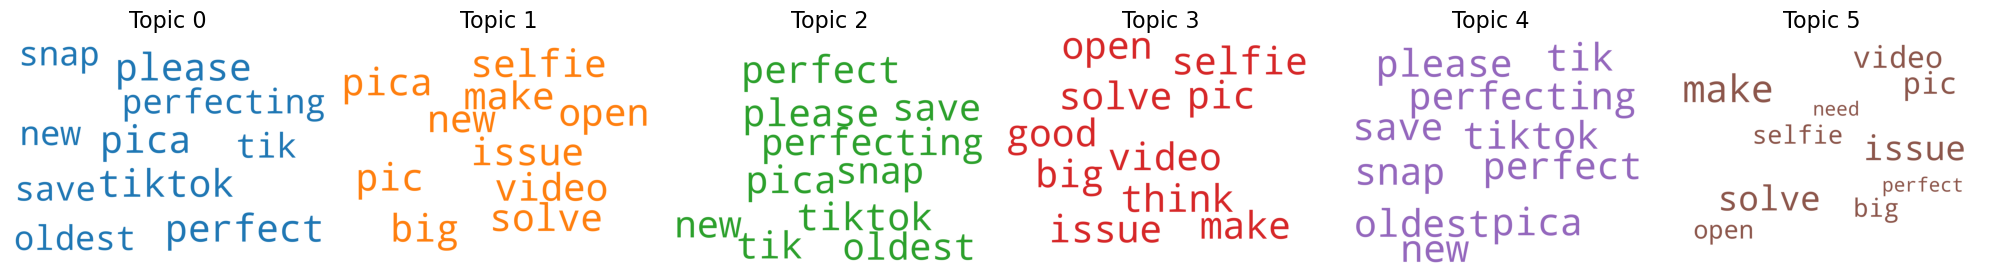

In [82]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(1, 6, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

- The topic modeller indentifies 6 topics with word clusters for each. The interpretation for each is given in the report.

# Topic 4: Text Summarization

In [27]:
## Extractive Text Summarization

In [28]:
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 


def text_summaization(text):
    # Input text - to summarize  
      
    # Tokenizing the text 
    stopWords = set(stopwords.words("english")) 
    words = word_tokenize(text) 
   
    # Creating a frequency table to keep the  
    # score of each word 
   
    freqTable = dict() 
    for word in words: 
        word = word.lower() 
        if word in stopWords: 
            continue
        if word in freqTable: 
            freqTable[word] += 1
        else: 
            freqTable[word] = 1
   
    # Creating a dictionary to keep the score 
    # of each sentence 
    sentences = sent_tokenize(text) 
    sentenceValue = dict() 
   
    for sentence in sentences: 
        for word, freq in freqTable.items(): 
            if word in sentence.lower(): 
                if sentence in sentenceValue: 
                    sentenceValue[sentence] += freq 
                else: 
                    sentenceValue[sentence] = freq 
   
   
   
    sumValues = 0
    for sentence in sentenceValue: 
        sumValues += sentenceValue[sentence] 
   
    # Average value of a sentence from the original text 
   
    average = int(sumValues / len(sentenceValue)) 
   
    # Storing sentences into our summary. 
    summary = '' 
    for sentence in sentences: 
        if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)): 
            summary += " " + sentence 
    print("Summarized Text::")
    print(summary) 
    
    return summary

In [29]:
df1['summary']=df1['content'].apply(lambda x: text_summaization(x))

Summarized Text::

Summarized Text::
 It won't let me send, see, or connect with my friends, my wifi and internet connection have been perfectly fine, I tried other apps as well and I found no issues, but when going to Snapchat, there is an issue with communicating, please help me/others fix this problem!
Summarized Text::
 But whenever I use the phones back camera's, it seems like it doesn't know how to properly switch between the different lenses when zooming in and out.
Summarized Text::
 It makes it super good for apple users (like dark mode) but for everyone else it kills the app. It keeps trying to push Snapchat plus, the fake tik tok and random stories of people you don't know. There's an ai that's stuck at the top of your conversation page and you have to PAY MONEY for a feature no one wanted.
Summarized Text::
 I can't make content videos with the editing or camera options & it won't even let me send messages on a snap picture it won't even pull up my keyboard. Properly if you

Summarized Text::
 I have Snapchat +, I like the different options, would like more better choices of notification sounds or be able to use my own sounds on my phone for different people. Also, it shows you that your story was watched again but doesn't show you by who, maybe add a count next to the person's name who rewatched your story?
Summarized Text::
 For weeks now, while I'm using Snapchat, the text entry field is hiding behind my keyboard where I cannot see anything that I've typed. The only way to stop this problem is to enable "hide camera cutout," but in doing so, front flash selfies are washed out because of the white all around camera.
Summarized Text::
 I have had this since 2013 I may not in 2024 because this app added so much bloat such as... 1 sponsored content called "discover" in stories you cant turn off that shows gross click bait 2 reccomended people forced into where friends stories are 3 useless "My AI"chatbot thats stuck at the top of your friends chat list you 

Summarized Text::
 This app is amazing, it's this good because it doesn't only have a chance for you to chat and call with your friends, it also has an option wether you want to see where people are or watch videos or stories. Also, I think Snapchat plus should be available to everyone or even just cheaper like 5 pounds a year.
Summarized Text::
 It has very good filters like wigs, just background, horns, face stuff and many more so I like it but the videos and stuff get sooo laggy that I have to clase and open and hence I don't even open them anymore so I'll give it a 4 or else it wud have been a 5.
Summarized Text::
 It's a really cool app to use if you wanna chat with friends and family, I have been using it for 4-5 years now. I don't like how 3d they look, and they look nothing like the other 2 old bitmojis, even the bitmojis on the snapmaps.
Summarized Text::
 Really went from, 2d:🙂, 3d:😀 and recent one:🤓 Nobody likes it, nobody asked for it and it's unnecessary.
Summarized Text::

Summarized Text::
 Now, any time I open snap, it's just constantly vibrating on my phone. This only happens while I'm on snap, and it causes a lot of the functions not to work. I've tried restarting my phone, uninstalling and reinstalling snap, silencing my phone, and snapchat nothing I'd working.
Summarized Text::
 So can you guys just add the old bitmoji. Also can you guys add back the bitmoji games. But if you guys can like please add back the old bitmoji, and the bitmoji games.
Summarized Text::
 Typical issues include app freezes when playing video from stories, instability and crashes, and unexpected lag even on very new and fairly high-performance hardware (Snapdragon 8+ Gen 1, 12GB RAM).
Summarized Text::

Summarized Text::
 I changed the icon and now the shortcuts to talk to recent people won't work anymore. I don't like the stories section of people I don't even know and the ads while paying... Its useless and I am not interested. They just dissappear out of nowhere or I don'

Summarized Text::
 This will be were pretty much everything is the same except you have a bigger screen, chats have a 3 line feature were you click and opens up chat settings.
Summarized Text::
 The 3d bitmojis are horrendous, snap streaks are glitching (like if you send a snap if won't render), they took away the number one best friend badge from the person I was #1 bff's with for the past 2 years, the ai is mad creepy and js annoying, and why do Android users have to pay for the things apple users get free?
Summarized Text::

Summarized Text::
 nobody cares that you're trying to be revelant, my new bitmoji looks like raggedy ann and all of them look like failed science experiments. They look like someone slammed them with a tire (just stop with the bitmoji updates already, the 2D ones looked fine) Also, Snapchat plus and the AI are pretty dumb, not helpful at all
Summarized Text::
 I'm not even kidding, everytime I've gotten on the app, nothing loads and then I get kicked off.
Summar

Summarized Text::
 I love this app I get to chat and send photos with my friends there are a few bugs like it freezes for me or my camera doesn't work and when your on a call with someone it just ends by its self plus I requested something can you guys make an option for dark mode?
Summarized Text::

Summarized Text::
 Sometimes there are little glitches here and there, but other then that, it's works fine! I like the update they put, so now I can have dark mode even on my tablet!
Summarized Text::
 The another one thing is randomly any person's snap's time becomes less means anybody has send video clip something with half second the video clip is being over but the actual clip is long not with all but some only .
Summarized Text::
 Now to access features you have to pay.. ITS SOCIAL MEDIA YOU MAKE MONEY OFF OF IT ANYWAYS. THEY MADE IT WORSE now there's an ai that Snapchat thinks is more important than your friends and family. STOP building this app around iPhone and not even consideri

Summarized Text::

Summarized Text::
 Although my pixel 6a and pixel 8 devices allows 3rd party apps to use all the camera sensors and night mode, snapchat doesn't make use of it, still takes the screenshots instead of actually clicking the pictures.
Summarized Text::

Summarized Text::
 But recently, it's been very buggy, and it's SEVERELY ANNOYING. I go to send something to someone, and it says it's not loading. Also, make a just GIF section so when I look for one, my bitmoji doesn't pop up. UPDATE SEP 11TH 2023: The new bitmoji update actually sucks, and the A.I. My snapchag lags way too much, and I'm at the point where I'll delete it.
Summarized Text::
 If I wanted I ugly bitmoji I would have made one but fun fact I don't but now I don't have a choice. They are horrendous, horrible, disgusting, foul, and any other word that could be used to describe these horrific new bitmojis. I stand for the people, and we all agree, ALL AGREE, this should be changed immediately!
Summarized Text:

Summarized Text::
 theres constant problems, ive been on this app for basically a decade and its never been enjoyable. the current most annoying issue is chats will not load, i can reopen the chat or the app and still wont load anything.
Summarized Text::
 I have been facing this problem many time and now it's more than 1 week... But still it's not working .... I have uninstalled and reinstalled it but still it's not working....
Summarized Text::
 I seriously want to know if there is any qa team for this Snapchat, if yes, how did they miss the following blunder. I'm not sure why this application auto corrects the last word before it is sent, even though we don't need it.
Summarized Text::
 after I close the app and open it again, no snaps load, can't go into messages, can't do anything after the latest update and the only way to fix it is to reinstall the app. Edit: the app now runs even slower with no apps in the background and snaps take even longer to send.
Summarized Text::
 Recent

Summarized Text::
 Experience was good but I'm requesting since 4 days to the the Snapchat that I've got a problem with saved snaps of one of my very close friend which just disappeared out of nowhere, they were so close to my heart and they just disappeared.
Summarized Text::
 I know this is not how it's set up on the iPhone app, and their back button is on the opposite side of the screen from the call buttons.
Summarized Text::
 I've been using Snapchat for a while and I've used it on both IOS and android. it's so simple to implement and would improve the experience tenfold. this small thing just makes me want to other Instagram which lets me do most of what the subscription service does for FREE?
Summarized Text::
 I like how you can post stories, send money to friends and contacts, see when your messages are open and read and that you can see if a user screenshot or screen recorded your content..
Summarized Text::
 Always clicking it by accident when I'm trying to reply to the most

Summarized Text::
 I dont want to see my ugly face or my messy room when i open the app, and the chat section is a cluster.... All the snapchat plus blah blah blah whatever is ridiculous, stop trying to get me to buy premium. Also bios would be nice for the extra customization, so i can let people know im not going to start a streak with them.
Summarized Text::
 I sent a snap to my friend of me being my stupid self, but it didn't go to my friend. I then deleted it but it only deleted it for me, so everybody can still see it, whereas i cannot.
Summarized Text::
 they've also locked my girlfriend out on her own phone and was using my phone to access her account too, now we both can't even get into our accounts.
Summarized Text::
 literally awful worst mistake of my life downloading this app I downloaded this app so I could talk to people and send silly pictures; but its evil grasp has led to many tears streaming down my face.
Summarized Text::
 I've been using Snapchat since like 6 years

Summarized Text::
 Androids in particular have a lot of glitches, the camera screen has a weird black bar at the top and bottom of the screen, which affects the quality of the snap, and first it takes seconds to capture the snap and then the filters. Android already doesn't have many good features compared to iOS not to mention dark mode, and now these many bugs have made it suffer at its peak, this is a sincere request, please
Summarized Text::

Summarized Text::
 Overall I agree that this app is sooo much worse on android than on iPhone and I have experienced most of the complications mentioned in other reviews, but I do enjoy the app. However I'm not sure if everyone else experiences this, but increasingly I will click on a 'popular' story/channel on the right hand side and it will load a completely different story?
Summarized Text::
 The camera quality has always been low but now whenever I take a photo and go to send it the app crashes and I have to go back in, re-take the photo a

Summarized Text::
 But since I switched to an android I can notice a huge difference in the app, it almost never gets the same updates as iPhones and always get less features.
Summarized Text::
 I'm not being led inside the app cause I don't give permission to for my photo and contact , camera. And yall trying to threw app store trying to allow yourself in private.
Summarized Text::
 Pretty fun app, but the last half a year of updates has been nothing but problems for android users like myself. Bottom line, if youre on android, tough luck as it'll work like trash, but I heard Iphones make it work well.
Summarized Text::
 I don't usually review apps especially social media, but damn this problem is becoming annoying, typing a text line in a photo I've taken and there's a filter slide bar covering it so I can't move the text or edit or anything.
Summarized Text::
 I still don't get why somebody becomes your best friend after speaking to them for 30 seconds, it's frustrating to see an ent

Summarized Text::
 If there's a bug fix (since I've tried everything on the support options), please push it through as soon as possible.
Summarized Text::
 I've had the update for 24 hours and its driving me insane, that I have to tap on the little chat icon next to the picture message to go to the chat rather than swipe and open chat so I can instantly reply, instead I swipe on a friends name and one snap maps, then I have to wait for it to load before I can close maps, to then click on the small icon to open chat just so im able to text.
Summarized Text::
 All the ads/posts have titles and display pics that have nothing to do with the content of the snap/post. Only good for personal snaps but I will never again click on any ads/promos because they have nothing to do with what the title or thumbnail pic would lead you to believe.
Summarized Text::
 I've tried clearing everything in canche, changed my settings, restarted my device etc.But it didn't work.When the camera does work and I

Summarized Text::

Summarized Text::
 its been a long time and snapchat for android is still the worst compared to iOS version.
Summarized Text::
 good filters but it needs to let people have effects on there face when there phone is not just portrait, but when landscape too. you can still do this landscape but you have to get the filters on your face/s portrait and then really slowly rotate your phone, because if you do it normal speed then the filters go off your face.
Summarized Text::
 I actually enjoy talking to the AI, he is like a better version of Google, which also, if you ask the right things, can teach you things such as effective methods of learning a language or learning about major things that are happening in the world. People are far too scared of the idea of talking to AI, but they're really not utilising this great technological advanment.
Summarized Text::
 For example I have like 1000+ friends on Snapchat (added them to increase my snapscore) ,now I want to remove t

Summarized Text::
 the bitmojis are genuinely the ugliest things I've ever seen and I'm not exaggerating, it looks like it's been ran over 5 times put in a blender, drank, been puked out and ran over again.
Summarized Text::
 Second- I don't got the snaps Friends are sending it only shows UPDATING MESSAGES but still not working. Third- when I reinstall the app again and i tried to login it shows TRY again later or check internet connection. In Short- Its worst app ever i lost my snapstreak also , Fix this.....😡😡 I don't wanna give it even one star
Summarized Text::
 I love itt so much but there is one problem I want music on photos that option u have but it doesn't work and the songs are not good soo the list should be full of music it will be more nice to use snap chat if u do this function of music on photos I hope it will be useful because every one want this function..thanks To give this app to us .🥰
Summarized Text::
 As i am not able to send messages to anyone , not even able to 

Summarized Text::
 It's fun and you can talk to your friends, it's never gets old and you and make the most memorable memories. The best thing is you can talk to you friends, make new friends, the filters a funny and great. You don't half to pay the app is completely free (which is good) if I were you I would download this app right away also have fun.🙂👍
Summarized Text::
 I can't even choose an audio for my snap from my mobile device, not even I can link to my snap from then and there only by searching the Indian Bollywood songs!!! Please add this feature this would be Highly recommend by most of the other users I believe... Also I would like to add more here, there is no dark mode available!!??
Summarized Text::
 quite perfect otherwise, buttt whenever you try to read a long message while someone else is actively writing to-/messaging you, it automatically scrolls down and you have to start over with the reading, would it be possible to have a "new messages, press to go down" type of

Summarized Text::
 Videos and pictures people send me directly don't go away unless I view it from the "chat" option that you can't just slide to anymore which i dont like.
Summarized Text::
 I didnt even care or use the map ever and now I can't swipe into chats without seeing a stupid map. Ya know, it's one thing to add a new layout, but its another when you stop the good functionality of the app.
Summarized Text::
 As much as I love snapchat and I use it everyday, when I moved to android after having an iphone i realised how bad it actually was. The picture quality is absolutely awful, it zooms in when your trying to take a photo, therefore making a good photo virtually impossible. The video quality is one of the worst I have seen, you can't even say it is my phone because on normal camera my phone is excellent to take photos on.
Summarized Text::
 Please make it stop going back to the to the top when you get messages. I would really appreciate if you guys could make the app were you

Summarized Text::
 It's a great app but lately (last 6 months) every time I've used snap on my Moto E4 plus it crashes horribly ,my phone jams up for ten minutes atleast and then restarts.
Summarized Text::

Summarized Text::
 for some reason the app seems to just give up whenever i try to send a video longer than 5 seconds, it takes days to send a video chunk by chunk, and after several hours of the video trying to upload it just says 'failed to send'. this problem has persisted for months on end, and is unrelated to the internet speed and signal strenghth, and i often wish I could simply stop the video from uploading, so I can send a picture instead.
Summarized Text::

Summarized Text::
 The only thing is my phone (the google pixel 2) does this thing where once and a while, i get texted a snap (pic) and it is just a black screen and it keeps coming up over and over again and it always says i have a new snap even though i dont and it gets REALLY annyoing!
Summarized Text::
 Works grea

Summarized Text::
 My account keeps getting temporarily locked for no reason and the same thing has happened to some of my friends to amd there is no way to unlock it before the set time so I've lost my streaks and everything too On top of that the my ai feature is so damn annoying and the fact that u need to pay to get it removed is so stupid.
Summarized Text::
 This app's been out for over half a decade and yet android users are still forced to use a lower quality version of the App than IPhone users. I get it, developing for a ton of different androids is harder than developing for 4 iphones a year. Instead of developing updates that literally just make the UI worse, could we get QOL changes instead for the Android user base?
Summarized Text::
 The latest bitmoji 3D avatar update looks terrible with bigger head and smaller body! Even a normal body shape looks thicker in 3D avatar with an ugly face now. There should be an option to use the bitmoji avatar outside snapchat and also do 

Summarized Text::
 managed to start talking to one of my friends on it and after a couple of messages it froze again, tried to close the app and the entire screen was frozen on black, tried to turn my phone on and off again to shut everything down and now my phone is stuck on the samsung powering on screen, and has been for 10 mins.
Summarized Text::
 Maybe because it tracks your location, even when location sharing is off? Maybe because it is permanently pinned to the top of your conversations, above even your friend's conversations?
Summarized Text::
 For an app to force an AI chatbot onto my friends list without the option of deleting it... horrible customer service idea.
Summarized Text::

Summarized Text::
 After contacting support more than 3 times, I've given up on trying, since it's clear I will never get it back, nor can I create a new account.
Summarized Text::

Summarized Text::
 updated the app since it was running kinda slow... litterally took 15 minutes after uploading th

Summarized Text::
 Nothing is working right literally when I'm in the middle if snapcaht spotlight it loads for like half a second and restarts my video I have the Samsung s21 fe.
Summarized Text::
 Bluetooth and Snapchat calling does not connect. The newest update is preventing me from connecting my Bluetooth headphones/car Bluetooth to have the ability to hear my friends through them. I can no longer use my Bluetooth devices to connect through Snapchat calling/video. These devs release stupid updates and always breaking other parts of the code.
Summarized Text::
 In the previous updates I was able to see every location and the time where I took every single snap in my mekories; just by opening any snap of my choice and long pressing on it. I really need to know every location that I took a snap since it is "Memories", and the time it took place.
Summarized Text::
 Which is kinda painful because I might have to delete my account and I have all my friends on there and have no other way

Summarized Text::
 Slow to open, slow to function, taking a photo, will result in a black screen, I have to back out of the photo, and take a second photo, and then the app will behave as intended.
Summarized Text::
 Since the last 2 updates, I have not been able to read the articles in the stories.
Summarized Text::
 snapchat is a good app to collect pictures or videos, however there is an annoying problem that should be fixed which is: When u save a picture or a video then after 2 days the video or the picture doesn't work.
Summarized Text::
 I kept sending snaps and keeping streaks with one of my friends for a long time and suddenly out of nowhere today the snap streak got broken, even when 24hrs didn't even complete. For this we tried again for starting up the snap streak one more time, kept sending snaps over & over but no luck, no sign of streaks are apparent.
Summarized Text::
 i don't understand this entirely, but whenever my phone dies my unanswered snapchat messages will disa

Summarized Text::

Summarized Text::
 Some of us will get notifs for peoples snaps and they won't be there, while everyone else can see it, and other times 3 peoples snaps just won't pop up at all for anyone.
Summarized Text::
 This app I amazing and I love it for being able to connect with a bunch of people, However I am having problems with Snapchat loading in general. Sometime when I open Snapchat to see if anyone has messaged me i have to refresh once on the app sometimes I have to reboott he app completely and every once and a while uninstall and reinstall, part of the reason for review.
Summarized Text::
 i can snap my friends and text them perfectly fine but there are many downsides like i like to play games and it lags out a lot and somrimes wont ler me send meassges to my friends it wont load other peoples stories, and says that nobody views my story after 4 hours of posting it later.
Summarized Text::
 All support options are only through email, no phone support, every thread

Summarized Text::
 It's good app atleast more than WhatsApp tho because it has many options for snaps, chats ,memories and also u can set the option of delete the chat after viewing.
Summarized Text::
 I am definitely optimistic for the future as it seems the cam quality is getting better or will get better, but the android version of snapchat right now is just too far behind the iphone version.
Summarized Text::
 Snapchat is okay but it doesnt have some things that SnapChat on IPhone has for example IPhones have more variety of filters and they also get the bounce affect and they can save & replace and image and andriods can only Save & Copy or get rid of it in general.
Summarized Text::
 First off, get rid of the annoying flash update and change it back to the quick flash that doesn't blind you the whole time you're on snap when it's enabled. This app used to be my favorite for communicating but fb and insta have basically all the same features so it isn't really worth it to have sna

Summarized Text::
 So the navigation bar still sucks but guess that's how they are trying to make more money from ads.... Also hitting unsubscribe hasn't been working at all.
Summarized Text::
 When they change, sometimes your favorite lense disappears, and you can never find it again. So you could have a little "i" over each lense, jusg like the letter that appears over lenses you add to the carousel. Please please PLEASE consider adding this, and the five stars are yours!
Summarized Text::

Summarized Text::
 The only thing I dont like is when I take a picture on my phone on snap (and my phone has a really good camera) it comes out all weird and grainy and dotty so i would like this bug fixed. Also another thing is when I'm not even using my phone I get a notification saying that my phone has detected snap using my camera and it's a little weird so can you fix this bug as well please??
Summarized Text::
 It is pinned at the top of your chat, you are unable to delete or block, it came

Summarized Text::
 Dear Snapchat, please get rid of the call feature. Anybody can call you without knowing your phone number, anybody can snap you a video call and you don't know them. Regardless what someone makes a snap about, random strangers should not be allowed to call or video call them.
Summarized Text::
 I used to get instant notifications and story reloads/updates now I can check my phone to see if someone opened a message I sent for over an hour straight and nothing and then I walk away for two minutes and it says it was opened an hour ago.
Summarized Text::
 I dont like using this aap now, I really HATE THIS APP. I would seriously love this aap if the change they have made can be reserved, dont know why I updated this app.
Summarized Text::
 To be fair the regular camera isn't anything to brag about but whenever I take a photo the quality lowers. I've been told this is because the developers are too lazy to fix the camera problem because there are too many android phones ou

Summarized Text::

Summarized Text::

Summarized Text::
 I have the galaxy 10 plus which has an AMAZING camera (Mostly everyone I know who compared pictures/videos says my camera is better than a iPhone's camera), but whenever I upload a picture/video to snapchat it looks terrible, it lags, it's just bad all together but when my boyfriend uploads anything (he has the iphone 11 pro), everything post perfect.
Summarized Text::
 Its really annoying that I can't delete or remove this AI from snapchat, and they made it that way too. I had to pay 8$ just to unpin this robot but I still can't seem to remove him, I hope its a bug/problem.
Summarized Text::
 It is really good although there is a flaw; first of all I actually uninstalled the app a few days ago...So I re-intalled it yesterday...So I took a pic in snapchat so I went to texts and all the fonts were gone!the only thing tuere is the @,classic and Big text...well I actually recently updated it before I opened it but I also have a ques

Summarized Text::
 I don't feel comfortable that Snapchat has turned it's whole user base into guinea pigs for this 3rd party AI. I use Snapchat to talk to my friends that are currently working and living in other countries so I can't delete it without losing contact but believe me if I had another option I would be uninstalling right now.
Summarized Text::
 A soft brick wherebi had to wait for my battery to completely die to be able to even charge it and turn it on. All my phone settings are default ( I don't change much stuff).
Summarized Text::
 Please fix this bug, I have 300+ day streaks that I'd love not to lose by uninstalling the app.
Summarized Text::
 Hello, I've just gotten a new galaxy S10 5G, upgraded from the S10+, and Snapchat doesn't seem to be working. Everytime I try to open it, it immediately crashes and I receive a "Snapchat keeps stopping" message. I have tried reinstalling several times: the app works fine each time it is reinstalled, I can log in and use it as no

Summarized Text::
 This is the six time I am sending you a message and to no avail. I cannot view whoever viewed my snaps nor can I see any snaps of anyone I added either which I'd very frustrating. Please give some attention to your users and sort out this problem. For I didn't eveb get a reply from you for the past 6 days!
Summarized Text::
 App is a absolute joke I was device banned on multiple phones as all I did was put my private insteagram on a private story.
Summarized Text::
 I use snap a lot to talk or call with my friends since it's the only shared platform we're on but I dont like the new call update, I liked it better when it was the bubbles on the bottom so you can have the call and chat open at the same time.
Summarized Text::
 My high-school isn't on there and it's like "your high-school shared story is taking off" like girl no. Snapchat, get rid if that stuff especially the AI. Once you get rid of those 2 things I will put my rating back to 5 stars.
Summarized Text::
 

Summarized Text::

Summarized Text::
 Thousands of people worldwide including me have had their accounts "temporarily disabled" and locked for the past few days. Everyone experiencing this issue has repeatedly took to social media platforms like Instagram, Twitter etc to express their frustration and concerns yet there has been no response from an actual human from the snapchat team providing an update on the situation.
Summarized Text::
 I have tried unlocking it to no avail, at first I'd forgotten my password, so I changed it, but now it is saying that my password is incorrect even though I had written it down this time to make sure I wouldn't forget this time.
Summarized Text::
 the only thing that i dont like about it is that I cant change my username, Like I made mine in 4th grade, and I cant change it, and I dont want to make a new account because ill have to add everyone again and Ill lose my snap score.
Summarized Text::
 I have had snapchat for the past 3 years, no complaints 

Summarized Text::
 Ive been with snapchat since 2015 I'm disappointed by how they just took it won't let me appeal or anything.
Summarized Text::
 I got it in March 2017, it's not that old and it has a Quad Core Processor, there's no reason your app should act so laggy and buggy on my phone, I guess it's because it's an Android phone right because I've seen someone Snapchat on a FREAKING IPHONE 4 and it was 10 TIMES QUICKER AND SMOOTHER than my phone!!!!
Summarized Text::
 Greedy developers that push MyAI to top of contacts list and can only be removed through paying. Better pay up because these greedy devs act like inverting the colors is a premium feature you should pay money for. Riddles with bugs that I bet theyll let you remove in the furure for a fee....
Summarized Text::

Summarized Text::
 Snapchat is overall a glitch I've been getting snaps and when I go see them it says that I've already seen it, and when I try to take a picture it freezes and it just closes I don't know what

Summarized Text::
 What's so inoin is that when my sister or friend types something and sends it to me it's saids sent on there phone but not mine so I can't read what they said so plz fix this also it saids delivered but my friend or on my sistets phone it will say open?!
Summarized Text::
 I need that fixed because every video i do on snap to put on my story or send to peple it wont add nor send nor does it save n its to the point if i send a video snap or video in messages it stops me from sending regular texts to ppl that video went to on here.
Summarized Text::
 I know some of the feature's people dislike though I can say several other apps for example things like discord new updates ect apps update and in my opinion not everyone will like the updates and some will I've seen people make comments about the new features to some people they've ruined the fun.
Summarized Text::
 Rating 3/5 stars because there isn't an option for App Appearance on Android phones - as of now, it's only 

Summarized Text::
 Also everyone finds this annoying cuz when you make your username in middleschool and can never change it, you end up with 20 year olds who are stuck with usernames like OneDirectionLover98.... let us change our usernames!
Summarized Text::
 Snapchat an important app to me that I use every day and I say makes contacting friends and family very easy, now as the rules are strict, as I have learned myself, all I can say is just don't do anything you wouldn't do or send in front of a cop.
Summarized Text::
 Customer support is horrible it's horrible if you can actually contact a real person then you're really lucky lucky because everybody else just gets these pre recorded bot messages That's where sorry please look at our terms and agreements are frequently ask questions To look for more help and then they end it with we are sorry we can no longer help you with this inquiry anymore.
Summarized Text::

Summarized Text::
 I like this app but it's just not working it keeps 

Summarized Text::
 So the application is otherwise great, fun, cool but suddenly i won't get a snap or it doesn't want to load a snap from my friends it is not very good we tried reset the cell phone uninstall snapchat then install it again, will update but nothing some people will lose all fireplaces by 300 + 🔥 or 100 +🔥 snaa snapchat those fire will not return so please fix it !!
Summarized Text::

Summarized Text::
 Ok its a good app i use it everyday but please get rid of MyAI it is super creepy and so many people have complained about this and they sent me weird messages and other people weird messages too like meeting up at a park but they are ai supposedly so how can they do that or even think of that??
Summarized Text::
 Please remove this option or at least give us the ability to remove it ourselves, I dont know a single person who likes nor wants it.
Summarized Text::
 I think Snapchat is fun for the filters and stories, but I suggest adding mass delete to chats, I think a lo

Summarized Text::

Summarized Text::
 but the bas thing is it always logs me out or freezes up or wont let me log back in when i log out but this app is still really good!!
Summarized Text::
 It was my favorite app for over 5 years till I was hacked by someone I thought I could trust and instead of givi n.v me a chance to rectify anything my account was ppermanently banned with no way to access my years worth of memories.
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 I see many reviews and I appreciated but guys you have to update the app its have everything fix ya but some mainly issues are there like you can't make your own profile photo you all only can bitmoji some people have their own profile pictures is why becuz if you're story gets 50k up viewers than you can put your own profile picture any it's the best app
Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::

Summarized Text::
 When im looking through story theres always a

Summarized Text::
 I want to tell something to developer of this app can u please give dark mode feature. I request you please do something and give us dark mode feature with next update.
Summarized Text::

Summarized Text::
 So many emoji in our face like dog's, cat's, ghost's,fox's . This app is so funny faces,ghost faces,wolfes, spiders,bear. U can export photos from snap chat to camera roll or many apps. There is also filters of pirate,genius,mad like this also.
Summarized Text::

Summarized Text::
 It's so funny the down anjali called this is very problem but it's very easy first tap in log in and enter goggle email and phone number snapchat send you OTP so you enter the OTP and some details anjali is very idiot But now I will talk about snapchat.
Summarized Text::

Summarized Text::

Summarized Text::
 What I like doin' there IS talking with my bff while we can't meet , takin' pictures and talking with some friends I like using this app! But for the bitmojis id like Snapchat to a

Summarized Text::

Summarized Text::
 I love using this app, but I created my account a while back when I was younger and now when people ask for my Snapchat I always get so embarrassed to give people my username, it would be really nice if there was a way to change my username.
Summarized Text::

Summarized Text::
 I can log into my account on one device then when i try to log into it on a different device which is the same model made in the same year it wont work so i cant log into my account on the device i usually use but on the other one i can when i do try and login to the account on my main device it says please check your network and try again even though im in the same building this is really annoying so can i get some help please.
Summarized Text::

Summarized Text::
 Snapchat banned both my accounts that I've had for over 4 years each for nothing. All memories, videos and pictures with all of my family and friends who are still with us or not. The worst app ever and all it e

Summarized Text::

Summarized Text::

Summarized Text::
 Obviously I love this app because its basically part of my life but if anyone from Snapchat headquarters sees this keep reading: I think it would be really cool if you knew how long a video was that someone sent you.
Summarized Text::
 Even there is full network speed, this app can't get installed.
Summarized Text::
 Idc to "flex" or "prove" anythin i jus like to make ppl laugh. I take ful advantage of the filters and I had to get a 2nd phone bc filld my old one up with snaps. if you could be so kind to ill gladly edit to 5⭐ and re-write this.Thx 4 Gr8 App.
Summarized Text::
 Yesterday morning I got onto my Snapchat around 11 am, I went to send my girlfriend a snap to keep our streak going, and it said I was unable to send the snap. I tried several times to email you guys through your help section on snap chats website, but I have never gotten any response.
Summarized Text::
 AI is a neucense, I want to disable it but can't, it a

In [30]:
df1.head()

Unnamed: 0                              reviewId        userName  \
0           0  bb0d447c-e50c-4993-9674-51b1a8fee666   Patience Rain   
1           1  004ba8a5-3c96-4e10-a311-369874403ab1   Tatiana Bilby   
2           2  9dc2ff9d-38dd-4f34-bb5c-dbfb89d141fb        POLINIZE   
3           3  e661c160-e1db-4f11-a701-9f8f4ee75ba0  lemonicingcake   
4           4  1ec5c74c-6378-4f30-9c62-198753cc5359    Allie Nicole   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  It's okay but for the life of me, I cannot fig...      2            810   
1  Hi there, when I first got this app, Snapchat ...      2            535   
2  I recently got a new phone, the Pixel 8 Pro. A...      3             90   
3  It sucks. It makes it super good for apple use...      1            114   
4  The app has gotten worse after the "bug fixes"...      2             30   

  reviewCreatedVersion                  at  replyContent  repliedAt  \
0           12.63.0.55 2023-12-11 01:56:05           NaN        NaN   
1           12.63.0.55 2023-12-12 22:13:51           NaN        NaN   
2           12.63.0.55 2023-12-11 15:00:02           NaN        NaN   
3           12.63.0.55 2023-12-12 03:54:42           NaN        NaN   
4           12.64.0.42 2023-12-12 19:00:26           NaN        NaN   

   appVersion  No_of_words  sentiment review_type  \
0  12.63.0.55           71     0.6310    Positive   
1  12.63.0.55           90     0.9622    Positive   
2  12.63.0.55           87     0.9600    Positive   
3  12.63.0.55           93    -0.9719    Negative   
4  12.64.0.42           88    -0.7351    Negative   

                                             summary  
0                                                     
1   It won't let me send, see, or connect with my...  
2   But whenever I use the phones back camera's, ...  
3   It makes it super good for apple users (like ...  
4   I can't make content videos with the editing ...

In [36]:
# Display the first 5 rows of 'content' and 'summary'
df1[['content', 'summary']].sample(5)

content  \
12538  Too Many Ads!!! You can't even watch a story t...   
14694  App is switching between cameras incorrectly. ...   
23919  Awesome this is a great app this app rate your...   
37735  Snapchat isfor most individuals use social med...   
16390  a friend and I added each other on Snapchat an...   

                                                 summary  
12538   You can't even watch a story till the end wit...  
14694   I have a Samsung Galaxy S22 Ultra, with this ...  
23919   This app rate your experience for ads shown i...  
37735   Snapchat isfor most individuals use social me...  
16390   And there used to be a little symbol next to ...

- The above shows how the automatic summarizer summarizes the review keeping only the essential points for the management to infer from

# ANALYSIS

In [3]:
import pandas as pd

import numpy as np
df_rev=pd.read_csv("C://Users//HP//Documents//IMIK//term5//TEXT//MIDSEM//New folder//SnapchatInitial50000Review.csv")

df_rev


Unnamed: 0                              reviewId  \
0               0  bb0d447c-e50c-4993-9674-51b1a8fee666   
1               1  004ba8a5-3c96-4e10-a311-369874403ab1   
2               2  9dc2ff9d-38dd-4f34-bb5c-dbfb89d141fb   
3               3  e661c160-e1db-4f11-a701-9f8f4ee75ba0   
4               4  1ec5c74c-6378-4f30-9c62-198753cc5359   
...           ...                                   ...   
49995       49995  5362f140-e437-44a5-9624-1967e20384e1   
49996       49996  e26ef4ac-e07b-4809-896e-48afe3472430   
49997       49997  8b1350c2-aadb-4b04-b634-86b8f16add4e   
49998       49998  14693535-8d5a-4452-a7de-d3f4d03e61e7   
49999       49999  9c69229e-5708-4075-9ba3-8095dddfa790   

                    userName  \
0              Patience Rain   
1              Tatiana Bilby   
2                   POLINIZE   
3             lemonicingcake   
4               Allie Nicole   
...                      ...   
49995   Joana Adubea Mirekua   
49996   1528 -Sanskriti Sahu   
49997          Alexis wilson   
49998            Khan Achina   
49999  CandiceDaPotato _chan   

                                               userImage  \
0      https://play-lh.googleusercontent.com/a/ACg8oc...   
1      https://play-lh.googleusercontent.com/a-/ALV-U...   
2      https://play-lh.googleusercontent.com/a-/ALV-U...   
3      https://play-lh.googleusercontent.com/a-/ALV-U...   
4      https://play-lh.googleusercontent.com/a-/ALV-U...   
...                                                  ...   
49995  https://play-lh.googleusercontent.com/a/ACg8oc...   
49996  https://play-lh.googleusercontent.com/a/ACg8oc...   
49997  https://play-lh.googleusercontent.com/a/ACg8oc...   
49998  https://play-lh.googleusercontent.com/a/ACg8oc...   
49999  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                                 content  score  \
0      It's okay but for the life of me, I cannot fig...      2   
1      Hi there, when I first got this app, Snapchat ...      2   
2      I recently got a new phone, the Pixel 8 Pro. A...      3   
3      It sucks. It makes it super good for apple use...      1   
4      The app has gotten worse after the "bug fixes"...      2   
...                                                  ...    ...   
49995  I love this app very much I really enjoy it in...      4   
49996  It really have some privacy concern that I'm w...      1   
49997  I would do 5 exsept for I've had this app for ...      4   
49998  Can you just please add a dark mode feature fo...      3   
49999  Its really easy to use and fun! When I took ph...      5   

       thumbsUpCount reviewCreatedVersion                   at  replyContent  \
0                810           12.63.0.55  2023-12-11 01:56:05           NaN   
1                535           12.63.0.55  2023-12-12 22:13:51           NaN   
2                 90           12.63.0.55  2023-12-11 15:00:02           NaN   
3                114           12.63.0.55  2023-12-12 03:54:42           NaN   
4                 30           12.64.0.42  2023-12-12 19:00:26           NaN   
...              ...                  ...                  ...           ...   
49995              0                  NaN  2020-12-04 04:22:48           NaN   
49996              0           12.25.0.35  2023-03-14 23:07:20           NaN   
49997              0           11.14.0.33  2021-02-15 02:06:06           NaN   
49998              2           11.85.1.32  2022-07-02 22:26:54           NaN   
49999              0                  NaN  2020-05-25 14:33:14           NaN   

       repliedAt  appVersion  
0            NaN  12.63.0.55  
1            NaN  12.63.0.55  
2            NaN  12.63.0.55  
3            NaN  12.63.0.55  
4            NaN  12.64.0.42  
...          ...         ...  
49995        NaN         NaN  
49996        NaN  12.25.0.35  
49997        NaN  11.14.0.33  
49998        NaN  11.85.1.32  
49999        NaN         NaN  

[50000 rows x 12 columns]

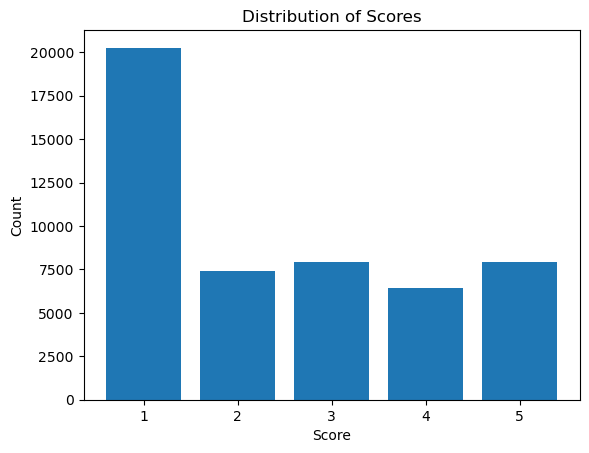

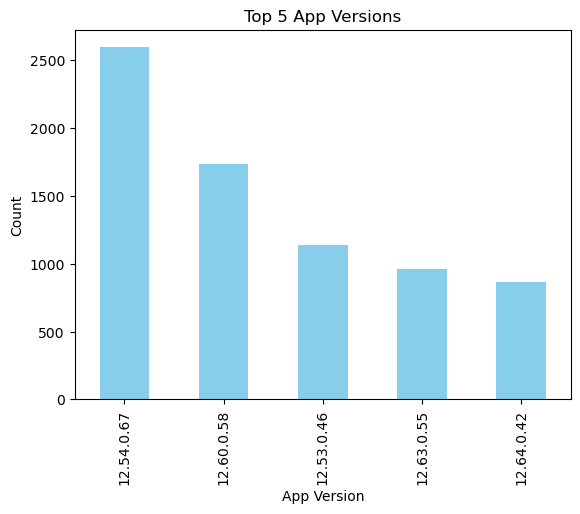

In [6]:
import pandas as pd
import matplotlib.pyplot as plt



# Distribution of Scores
score_distribution = df_rev['score'].value_counts().sort_index()

# Plotting the distribution of scores
plt.bar(score_distribution.index, score_distribution.values)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

# Top 5 App Versions
top_app_versions = df_rev['appVersion'].value_counts().nlargest(5)

# Plotting the top 5 app versions
top_app_versions.plot(kind='bar', color='skyblue')
plt.xlabel('App Version')
plt.ylabel('Count')
plt.title('Top 5 App Versions')
plt.show()

In [7]:
#Counting the number of words 
def length(text):
    return len(text.split())

In [8]:

selected_rows = []
df_rev["No_of_words"]=df_rev['content'].apply(lambda x: length(x)) #Calculating no of words for each review

# df_rev is our original DataFrame
# Create an empty list to store selected rows

selected_rows = []

# Iterate over the rows of df_rev
for i in range(len(df_rev)):
    if df_rev["No_of_words"][i] > 70:
        selected_rows.append(df_rev.loc[i])

# Create a new DataFrame from the selected rows
df1 = pd.DataFrame(selected_rows)

# Print or use the selected_df as needed
df1

Unnamed: 0                              reviewId        userName  \
0               0  bb0d447c-e50c-4993-9674-51b1a8fee666   Patience Rain   
1               1  004ba8a5-3c96-4e10-a311-369874403ab1   Tatiana Bilby   
2               2  9dc2ff9d-38dd-4f34-bb5c-dbfb89d141fb        POLINIZE   
3               3  e661c160-e1db-4f11-a701-9f8f4ee75ba0  lemonicingcake   
4               4  1ec5c74c-6378-4f30-9c62-198753cc5359    Allie Nicole   
...           ...                                   ...             ...   
49831       49831  cac49a3c-a7c9-4ac4-a453-ee7a0f7d5422     Primo Silva   
49837       49837  57f4d012-b4ec-40cb-8e5c-4688c7aa23f1   A Google user   
49880       49880  4a0cb355-eba2-4836-8b03-abad866c7735   A Google user   
49890       49890  5cae2f8f-b728-4673-a472-4d673d2ae660   A Google user   
49927       49927  53e4156e-426c-40d5-8bab-82aeecc564a9   A Google user   

                                               userImage  \
0      https://play-lh.googleusercontent.com/a/ACg8oc...   
1      https://play-lh.googleusercontent.com/a-/ALV-U...   
2      https://play-lh.googleusercontent.com/a-/ALV-U...   
3      https://play-lh.googleusercontent.com/a-/ALV-U...   
4      https://play-lh.googleusercontent.com/a-/ALV-U...   
...                                                  ...   
49831  https://play-lh.googleusercontent.com/a/ACg8oc...   
49837  https://play-lh.googleusercontent.com/EGemoI2N...   
49880  https://play-lh.googleusercontent.com/EGemoI2N...   
49890  https://play-lh.googleusercontent.com/EGemoI2N...   
49927  https://play-lh.googleusercontent.com/EGemoI2N...   

                                                 content  score  \
0      It's okay but for the life of me, I cannot fig...      2   
1      Hi there, when I first got this app, Snapchat ...      2   
2      I recently got a new phone, the Pixel 8 Pro. A...      3   
3      It sucks. It makes it super good for apple use...      1   
4      The app has gotten worse after the "bug fixes"...      2   
...                                                  ...    ...   
49831  Of there's a problem with Snapchat how can I c...      1   
49837  Sorry for this report I love snapchat dearly b...      1   
49880  my problem with snapchat is the constant lag o...      5   
49890  I have owned multiple devices that at one poin...      2   
49927  Its the best app i have all my siblings my par...      5   

       thumbsUpCount reviewCreatedVersion                   at  replyContent  \
0                810           12.63.0.55  2023-12-11 01:56:05           NaN   
1                535           12.63.0.55  2023-12-12 22:13:51           NaN   
2                 90           12.63.0.55  2023-12-11 15:00:02           NaN   
3                114           12.63.0.55  2023-12-12 03:54:42           NaN   
4                 30           12.64.0.42  2023-12-12 19:00:26           NaN   
...              ...                  ...                  ...           ...   
49831              1           12.35.0.45  2023-06-07 17:38:32           NaN   
49837              2            10.56.0.0  2019-05-16 07:40:55           NaN   
49880              3            10.62.0.0  2019-08-05 03:55:57           NaN   
49890              6            10.42.0.0  2018-10-03 02:11:44           NaN   
49927              1            10.79.5.0  2020-04-11 18:50:18           NaN   

       repliedAt  appVersion  No_of_words  
0            NaN  12.63.0.55           71  
1            NaN  12.63.0.55           90  
2            NaN  12.63.0.55           87  
3            NaN  12.63.0.55           93  
4            NaN  12.64.0.42           88  
...          ...         ...          ...  
49831        NaN  12.35.0.45           89  
49837        NaN   10.56.0.0           77  
49880        NaN   10.62.0.0           95  
49890        NaN   10.42.0.0          158  
49927        NaN   10.79.5.0           76  

[6878 rows x 13 columns]

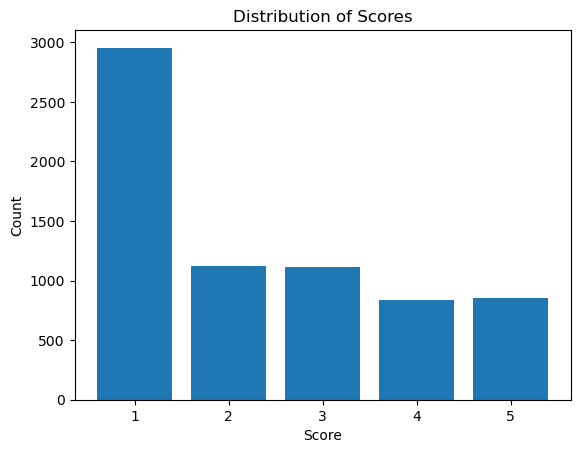

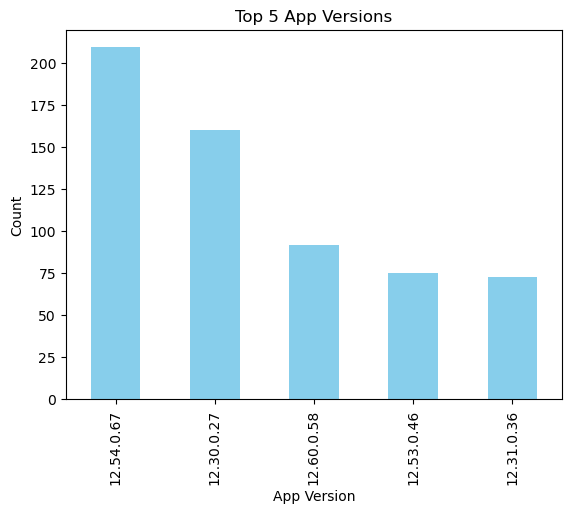

In [9]:

# Distribution of Scores
score_distribution = df1['score'].value_counts().sort_index()

# Plotting the distribution of scores
plt.bar(score_distribution.index, score_distribution.values)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

# Top 5 App Versions
top_app_versions = df1['appVersion'].value_counts().nlargest(5)

# Plotting the top 5 app versions
top_app_versions.plot(kind='bar', color='skyblue')
plt.xlabel('App Version')
plt.ylabel('Count')
plt.title('Top 5 App Versions')
plt.show()

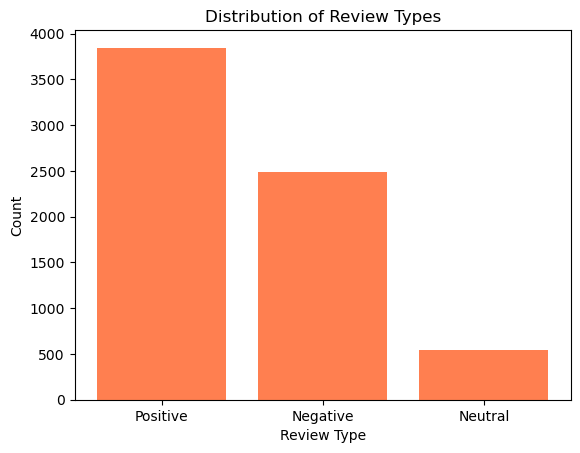

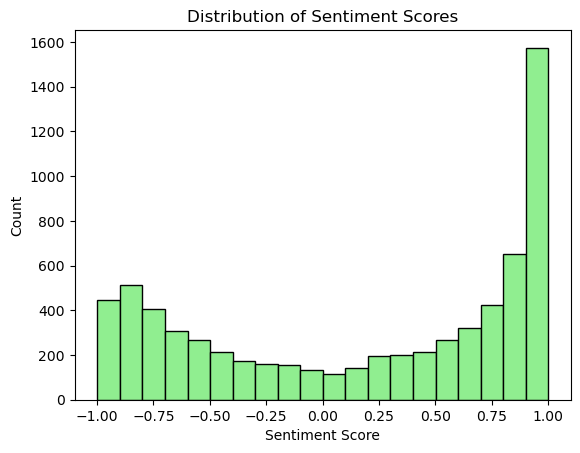

In [15]:

# Distribution of review_type
review_type_distribution = df1['review_type'].value_counts()

# Plotting the distribution of review_type
plt.bar(review_type_distribution.index, review_type_distribution.values, color='coral')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.title('Distribution of Review Types')
plt.show()

# Sentiment Score Distribution
sentiment_distribution = df1['sentiment']

# Plotting the sentiment score distribution
plt.hist(sentiment_distribution, bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Scores')
plt.show()

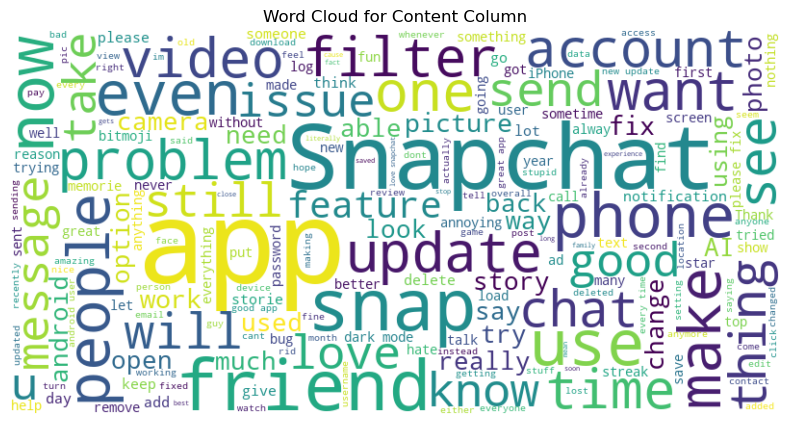

In [17]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Combine all the text in the 'content' column
text = ' '.join(df1['content'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Content Column')
plt.show()


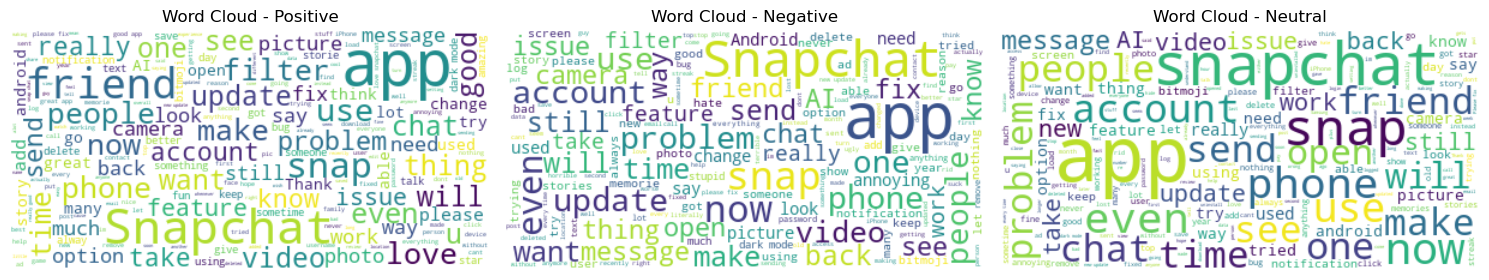

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns


# Unique review types
review_types = df1['review_type'].unique()

# Create subplots in one line
fig, axes = plt.subplots(1, len(review_types), figsize=(15, 5))

# Iterate over each review type
for i, review_type in enumerate(review_types):
    # Filter DataFrame for the current review type
    filtered_df = df1[df1['review_type'] == review_type]
    
    # Combine all the text in the 'content' column for the current review type
    text = ' '.join(filtered_df['content'].astype(str))
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
    
    # Display the generated word cloud using matplotlib
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'Word Cloud - {review_type}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


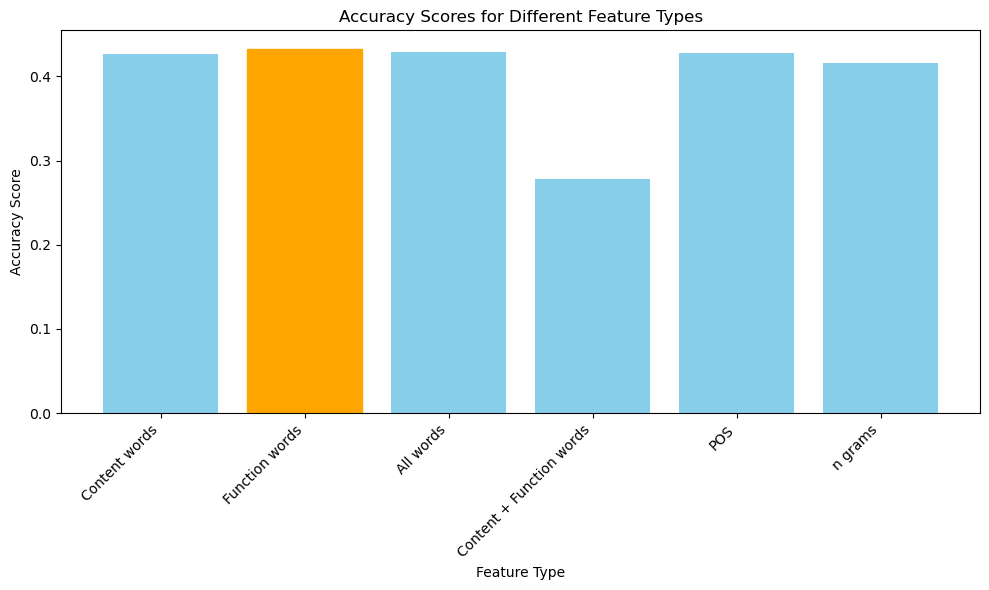

In [1]:
import matplotlib.pyplot as plt

accuracy_scores = {
    'Content words': 0.42670982804440877,
    'Function words': 0.433,
    'All words': 0.42848803620432335,
    'Content + Function words': 0.2777995630496891,
    'POS': 0.42750368142950834,
    'n grams': 0.4162196439779735
}

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')

# Highlight the highest bar
max_score = max(accuracy_scores.values())
max_index = list(accuracy_scores.values()).index(max_score)
bars[max_index].set_color('orange')

# Add labels and title
plt.xlabel('Feature Type')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Feature Types')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
